In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm

# Business Problem:
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [3]:
df=pd.read_csv('data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


# Dataset Characteristics

In [4]:
df.shape

(550068, 10)

There are 550068 rows and 10 columns

In [5]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There is no null values

In [6]:
df[df.isnull().any(axis=1)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [7]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


It looks like User_ID, Occupation, Marital_Status, Product_Categoryand Purchase are integer and rest are in string format.

In [9]:
df.Gender.value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [10]:
df.Age.value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [11]:
df.Occupation.value_counts()

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

In [12]:
df.City_Category.value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [13]:
df.Stay_In_Current_City_Years.value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [14]:
df.Marital_Status.value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

In [15]:
df.Product_Category.value_counts()

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

**Given by the description and dataframe, we can conclude below details:**
- **Continuous Variables:**
  - Purchase (Purchase Amount)
- **Categorical Variables:**
  - Age (Age in bins, although age itself is continuos variable but here it is represented in bins)
  - User_ID (User ID)
  - Product_ID (Product ID)
  - Gender (Sex of User: M & F)
  - City_Category (Category of the City - A, B, C)
  - Marital_Status (Marital Status: 0 & 1)
  - Occupation (Occupation, assuming it represents numerical form)
  - Stay_In_Current_City_Years (Number of years stay in the current city, Now there is '4+' mentioned along with (0, 1, 2, 3) but not 4 which means customers living for either 4 years or more than 4 years or both are put in '4+', so we will convert it to 4 for better analysis with keeping in mind the condition)
  - Product_Category (Product Category, assuming it's represented as numerical form)

In [16]:
df.Stay_In_Current_City_Years=df.Stay_In_Current_City_Years.replace('4+', '4').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  int32 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int32(1), int64(5), object(4)
memory usage: 39.9+ MB


# Null Values and Outliners

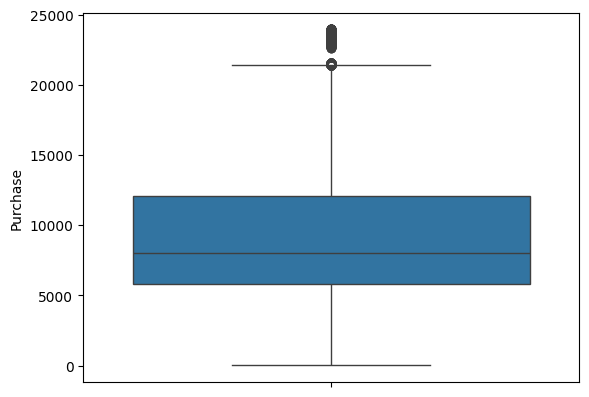

In [17]:
sns.boxplot(df.Purchase)
plt.show()

In [18]:
#higher-end whisker value detection
df.Purchase.quantile(0.75)+1.5*(df.Purchase.quantile(0.75)-df.Purchase.quantile(0.25))

21400.5

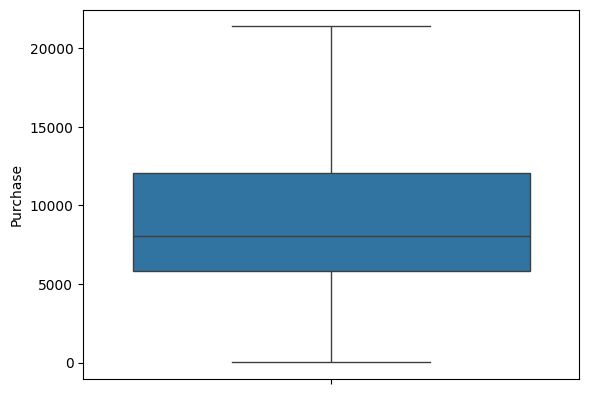

In [19]:
#removing of outliner
low, high=df.Purchase.quantile([0, 0.995135]).astype(int)
df.Purchase=np.clip(df.Purchase, low, high)
sns.boxplot(df.Purchase)
plt.show()

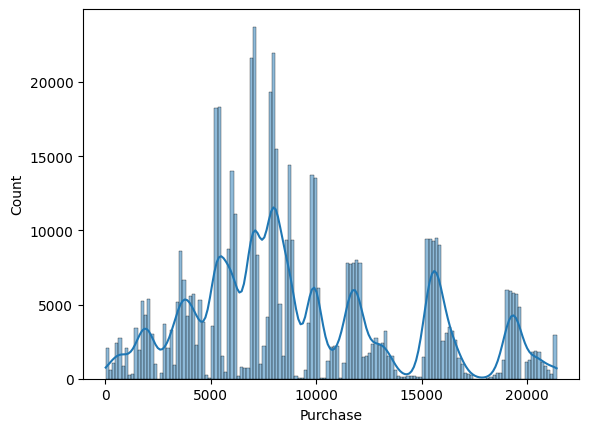

In [20]:
sns.histplot(df.Purchase, kde=True)
plt.show()

#### Insights:
- The highest peak is around a purchase price of 5000-7500, indicating that this is the most common purchase price range.
- There is another noticeable peak around 15000, suggesting another common price point for purchases.
- It seems that this could be a multimodal distribution, which indicates that there are different groups within the data. Each mode could potentially represent a different group. The prominent peaks could be due to popular products priced at those specific amounts or it could indicate preferred spending amounts by customers.

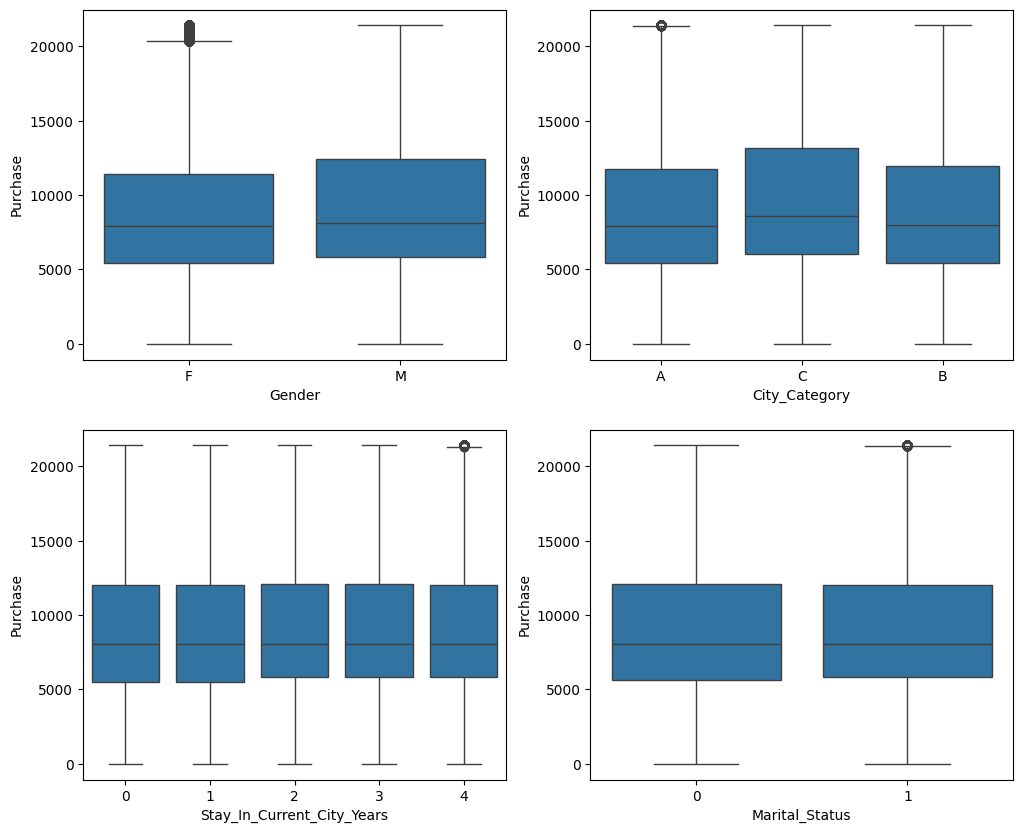

In [21]:
plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)
sns.boxplot(data=df, x='Gender', y='Purchase')
plt.subplot(2,2,2)
sns.boxplot(data=df, x='City_Category', y='Purchase')
plt.subplot(2,2,3)
sns.boxplot(data=df, x='Stay_In_Current_City_Years', y='Purchase')
plt.subplot(2,2,4)
sns.boxplot(data=df, x='Marital_Status', y='Purchase')
plt.show()

#### Insights:
- **Gender:** The purchase amounts are relatively similar between genders F and M, with M having a slightly wider range.
- **City Category:** City category B has the highest median purchase amount, followed by C and A. The interquartile range is similar across all city categories.
- **Stay in Current City Years:** There is no significant difference in purchase amounts based on the number of years stayed in the current city. All categories have a similar median and interquartile range.
- **Marital Status:** Both categories (0 and 1) have almost identical medians and interquartile ranges, indicating marital status does not significantly impact purchase amounts.

#### Analysis:
- The purchase amounts are not significantly influenced by the gender, city category, stay in current city years, or marital status of the customers. The distributions are quite similar across all these categories. This could suggest that these factors do not play a major role in determining the purchase amounts.

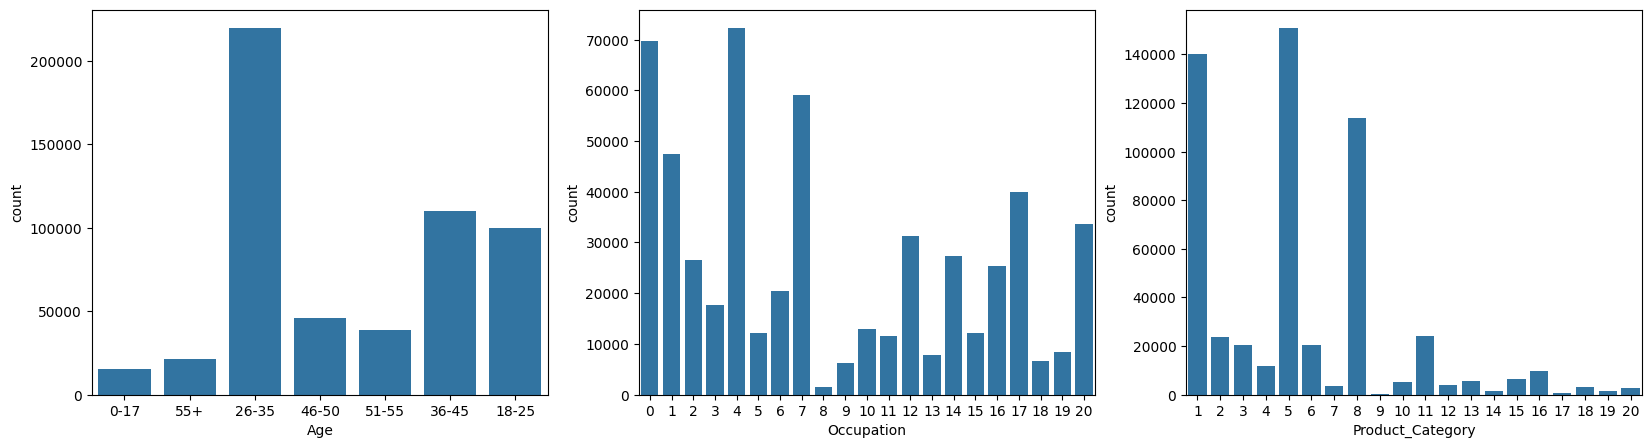

In [22]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.countplot(data=df, x='Age')
plt.subplot(1,3,2)
sns.countplot(data=df, x='Occupation')
plt.subplot(1,3,3)
sns.countplot(data=df, x='Product_Category')
plt.show()

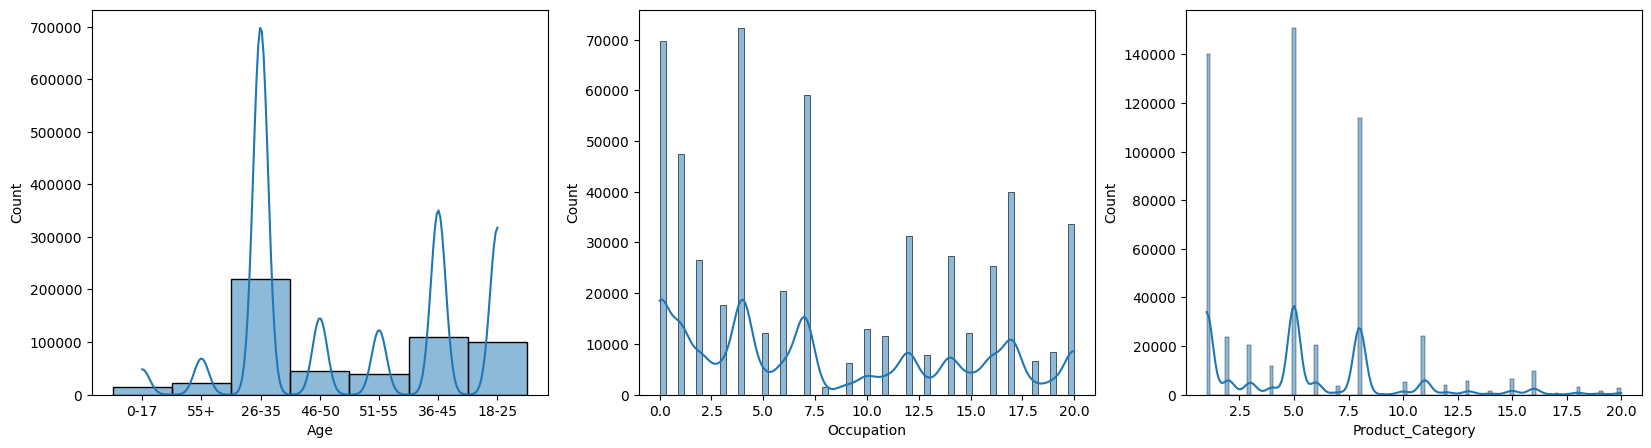

In [23]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.histplot(data=df, x='Age', kde=True)
plt.subplot(1,3,2)
sns.histplot(data=df, x='Occupation', kde=True)
plt.subplot(1,3,3)
sns.histplot(data=df, x='Product_Category', kde=True)
plt.show()

#### Insights:
- **Age Group:** The majority of individuals are in the “26-35” age group, followed by the “18-25” and “36-45” groups. This suggests a younger demographic is being represented or targeted.
- **Occupation:** Occupation “4” has the highest count, followed by “0” and “7”. It indicates that these occupations are more common or have higher data entries in this particular dataset.
- **Product Category:** Categories “5”, “1”, and “8” have higher counts, indicating these products are popular or commonly purchased.

#### Analysis:
The data represents a younger demographic, with certain occupations being more prevalent. The product categories with higher counts could be the ones that are more popular or commonly purchased among these individuals. This information could be useful for targeted marketing or product development strategies aimed at these specific demographics.

In [24]:
df.Purchase.min(), df.Purchase.max()

(12, 21400)

In [25]:
np.linspace(12, 21400, 4)

array([1.20000000e+01, 7.14133333e+03, 1.42706667e+04, 2.14000000e+04])

In [26]:
# Define bin edges
bin_edges = [12, 7141, 14270, 21400]

# Define bin labels
bin_labels = ['Low_income_group', 'Medium_income_group', 'High_income_group']

# Create a new column with bins
df['Purchase_Bins'] = pd.cut(df['Purchase'], bins=bin_edges, labels=bin_labels)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Purchase_Bins
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Medium_income_group
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,High_income_group
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Low_income_group
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,Low_income_group
4,1000002,P00285442,M,55+,16,C,4,0,8,7969,Medium_income_group
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368,Low_income_group
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371,Low_income_group
550065,1006036,P00375436,F,26-35,15,B,4,1,20,137,Low_income_group
550066,1006038,P00375436,F,55+,1,C,2,0,20,365,Low_income_group


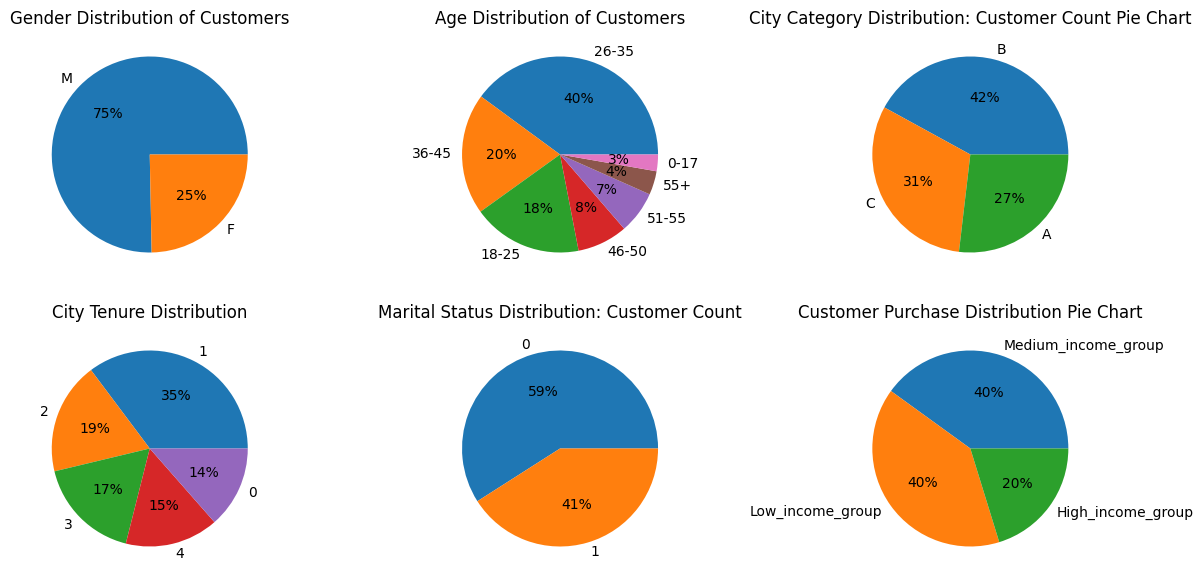

In [27]:
plt.figure(figsize=(15,7))
plt.subplot(2, 3, 1)
plt.pie(df.Gender.value_counts(), labels=df.Gender.value_counts().index, autopct='%.0f%%')
plt.title('Gender Distribution of Customers')
plt.subplot(2, 3, 2)
plt.pie(df.Age.value_counts(), labels=df.Age.value_counts().index, autopct='%.0f%%')
plt.title('Age Distribution of Customers')
plt.subplot(2, 3, 3)
plt.pie(df.City_Category.value_counts(), labels=df.City_Category.value_counts().index, autopct='%.0f%%')
plt.title('City Category Distribution: Customer Count Pie Chart')
plt.subplot(2, 3, 4)
plt.pie(df.Stay_In_Current_City_Years.value_counts(), labels=df.Stay_In_Current_City_Years.value_counts().index, autopct='%.0f%%')
plt.title('City Tenure Distribution')
plt.subplot(2, 3, 5)
plt.pie(df.Marital_Status.value_counts(), labels=df.Marital_Status.value_counts().index, autopct='%.0f%%')
plt.title('Marital Status Distribution: Customer Count')
plt.subplot(2, 3, 6)
plt.pie(df.Purchase_Bins.value_counts(), labels=df.Purchase_Bins.value_counts().index, autopct='%.0f%%')
plt.title('Customer Purchase Distribution Pie Chart')
plt.show()

#### Insights:
- **Gender Distribution:** The majority of customers are male, making up 75% of the total.
- **Age Distribution:** The largest age group among the customers is 26-35 years old, accounting for 40% of the total.
- **City Category:** Most customers belong to city category B, which constitutes 42% of the total.
- **City Tenure:** The largest segment of customers have a city tenure of one year, making up 35% of the total.
- **Marital Status:** The majority of customers are unmarried, accounting for 59% of the total.
- **Income Group:** The customer base is evenly distributed between the low and medium income groups, each constituting about 40%.

In [28]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Purchase_Bins
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Medium_income_group
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,High_income_group
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Low_income_group
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,Low_income_group
4,1000002,P00285442,M,55+,16,C,4,0,8,7969,Medium_income_group


In [29]:
df.describe()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,1.858418,0.409653,5.404270,9255.021863
std,1.727592e+03,6.522660,1.289443,0.491770,3.936211,4999.510373
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,2.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,3.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,4.000000,1.000000,20.000000,21400.000000


#### Insights:
- The dataset contains information on over 550,000 unique users.
- Users have varying occupations, with an average occupation value around 8.08 and a standard deviation of approximately 6.52.
- Marital status is mostly unmarried, with an average value of about 0.41 and a standard deviation of around 0.49.
- Purchases span across different product categories, with an average category value of approximately 5.40 and a standard deviation of about 4.0.
- Purchase amounts vary widely, with an average of around 9255.02 and a standard deviation of approximately 5000.

<Axes: >

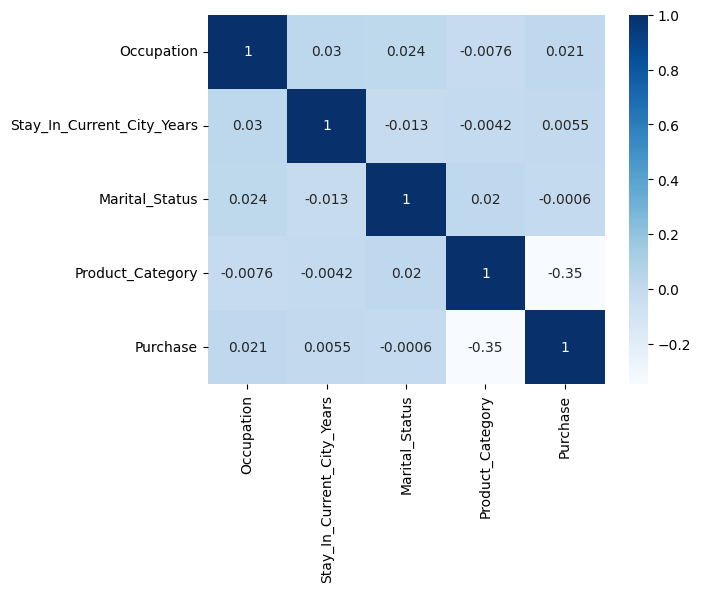

In [30]:
sns.heatmap(df[['Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',	'Purchase']].corr(), annot=True, cmap='Blues')

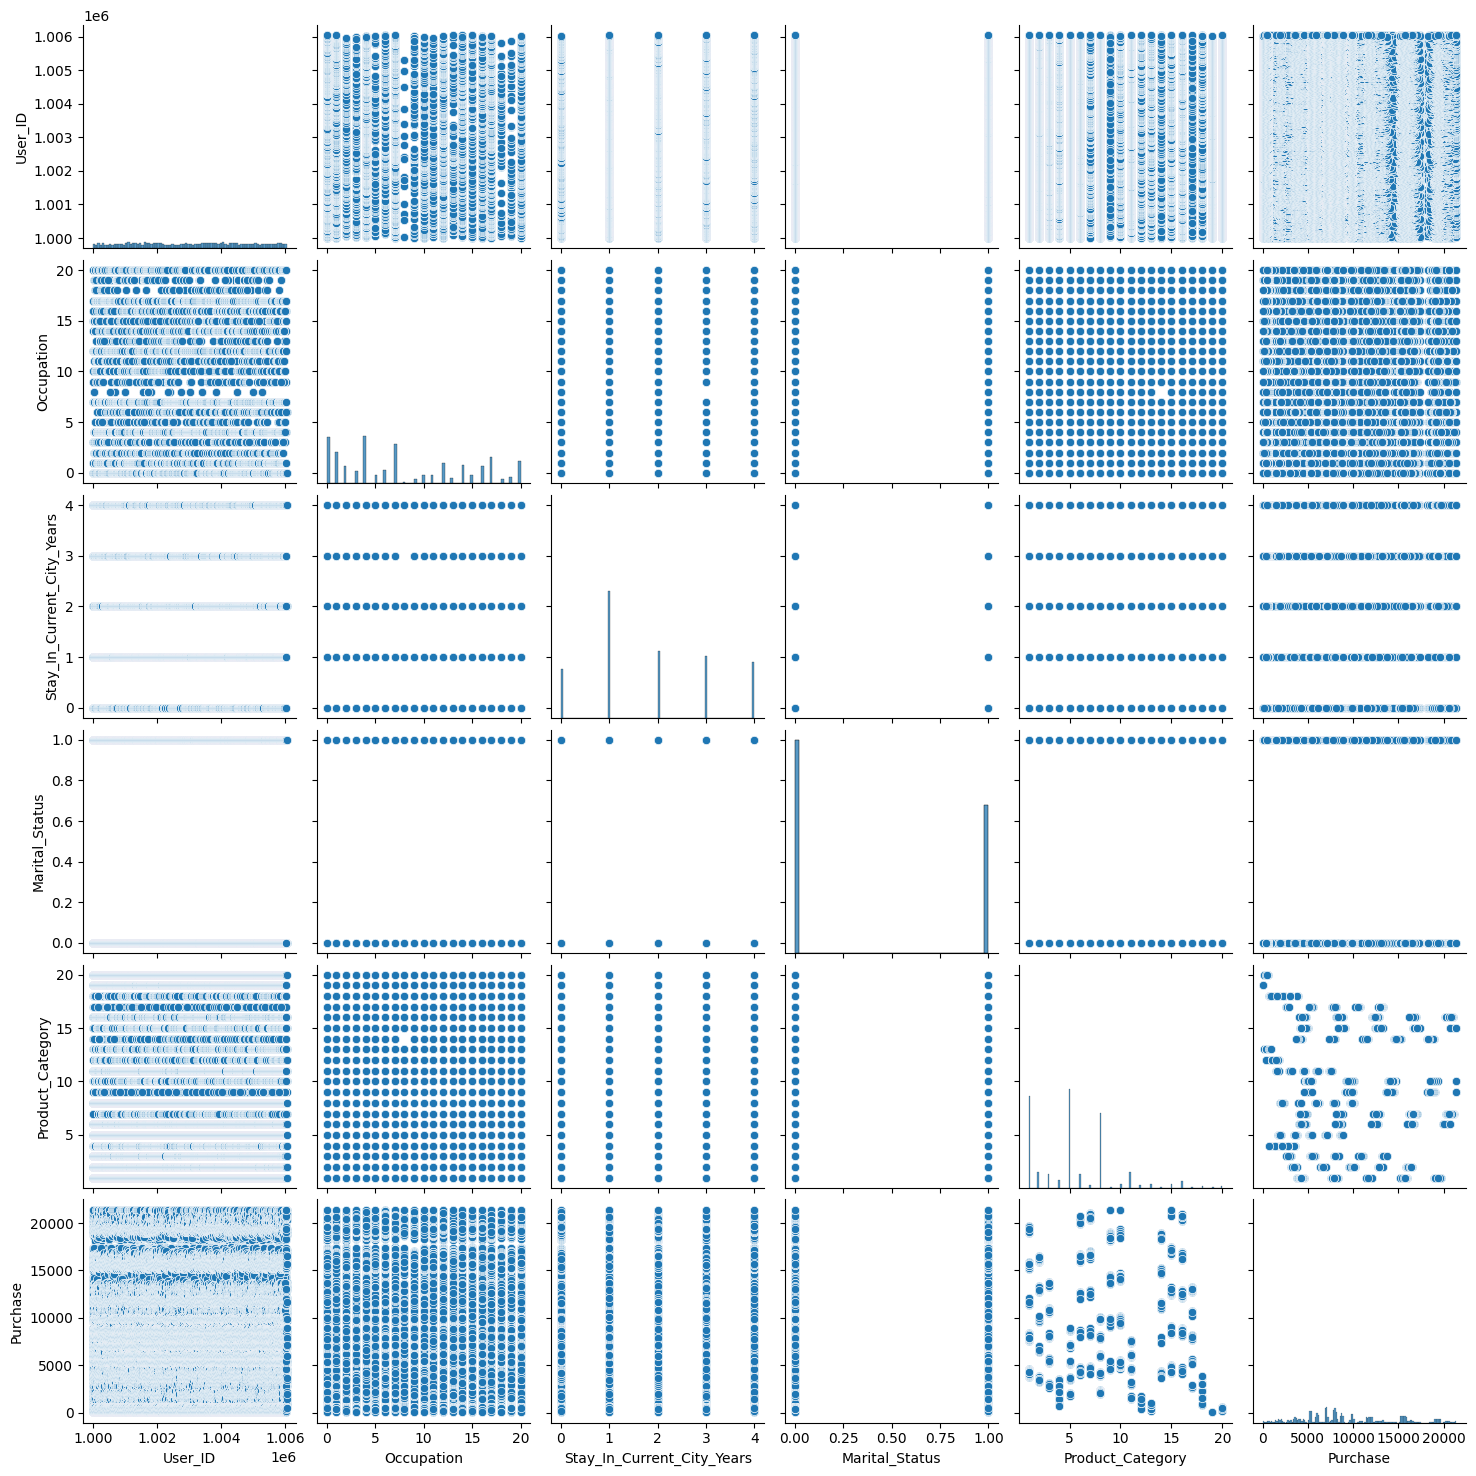

In [31]:
sns.pairplot(df)

#### Insights:
- **Occupation and Marital_Status:** These two variables have a very weak positive correlation of 0.025. This suggests that there’s almost no linear relationship between a person’s occupation and their marital status.
- **Stay_In_Current_City_Years and Purchase** have a very weak positive correlation of 0.0055, suggesting that the length of stay in the current city has a negligible effect on Purchase.
- **Occupation and Product_Category:** These variables have a negligible negative correlation of -0.0072. This indicates that there’s no significant linear relationship between a person’s occupation and the product category they choose.
- **Occupation and Purchase:** These variables have a very weak positive correlation of 0.021. This suggests that a person’s occupation has very little impact on their purchasing behavior.
- **Marital_Status and Product_Category:** These variables have a very weak positive correlation of 0.019. This suggests that a person’s marital status has very little impact on the product category they choose.
- **Marital_Status and Purchase:** These variables have an almost non-existent negative correlation of -0.0011. This indicates that a person’s marital status has almost no impact on their purchasing behavior.
- **Product_Category and Purchase:** These variables have a moderate negative correlation of -0.37. This suggests that as the product category number increases, the purchase amount tends to decrease.

In **conclusion**, none of the variables have a strong correlation with each other based on the provided data. The strongest relationship is a moderate negative correlation between Product_Category and Purchase.

# Data Exploration

In [32]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Purchase_Bins
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Medium_income_group
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,High_income_group
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Low_income_group
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,Low_income_group
4,1000002,P00285442,M,55+,16,C,4,0,8,7969,Medium_income_group


In [33]:
pd.crosstab(df.Product_Category,df.Age, margins=True)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Product_Category,,,,,,,,
1,3585,26962,58249,27648,10474,9049,4411,140378
2,805,4428,8928,4912,2105,1781,905,23864
3,1200,4710,7662,3854,1376,924,487,20213
4,758,2463,4192,2354,990,678,318,11753
5,4330,28522,61473,29377,11971,9893,5367,150933
6,399,3749,8485,3899,1622,1450,862,20466
7,53,481,1651,809,327,266,134,3721
8,2258,17911,44256,23296,10656,9340,6208,113925
9,16,63,154,107,33,29,8,410


In [34]:
pd.crosstab(df.Product_Category,df.Age, margins=True, normalize=True)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Product_Category,,,,,,,,
1,0.006517,0.049016,0.105894,0.050263,0.019041,0.016451,0.008019,0.255201
2,0.001463,0.008050,0.016231,0.008930,0.003827,0.003238,0.001645,0.043384
3,0.002182,0.008563,0.013929,0.007006,0.002502,0.001680,0.000885,0.036746
4,0.001378,0.004478,0.007621,0.004279,0.001800,0.001233,0.000578,0.021366
5,0.007872,0.051852,0.111755,0.053406,0.021763,0.017985,0.009757,0.274390
6,0.000725,0.006816,0.015425,0.007088,0.002949,0.002636,0.001567,0.037206
7,0.000096,0.000874,0.003001,0.001471,0.000594,0.000484,0.000244,0.006765
8,0.004105,0.032561,0.080456,0.042351,0.019372,0.016980,0.011286,0.207111
9,0.000029,0.000115,0.000280,0.000195,0.000060,0.000053,0.000015,0.000745


In [35]:
pd.crosstab(df.Product_Category,df.Age, margins=True, normalize='index')

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Product_Category,,,,,,,
1,0.025538,0.192067,0.414944,0.196954,0.074613,0.064462,0.031422
2,0.033733,0.185551,0.374120,0.205833,0.088208,0.074631,0.037923
3,0.059368,0.233018,0.379063,0.190669,0.068075,0.045713,0.024093
4,0.064494,0.209564,0.356675,0.200289,0.084234,0.057687,0.027057
5,0.028688,0.188971,0.407287,0.194636,0.079313,0.065546,0.035559
6,0.019496,0.183182,0.414590,0.190511,0.079253,0.070849,0.042119
7,0.014243,0.129266,0.443698,0.217415,0.087880,0.071486,0.036012
8,0.019820,0.157217,0.388466,0.204485,0.093535,0.081984,0.054492
9,0.039024,0.153659,0.375610,0.260976,0.080488,0.070732,0.019512


In [36]:
pd.crosstab(df.Product_Category,df.Age, margins=True, normalize='columns')

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Product_Category,,,,,,,,
1,0.237386,0.270540,0.265266,0.251316,0.229185,0.235033,0.205125,0.255201
2,0.053304,0.044431,0.040658,0.044649,0.046060,0.046259,0.042085,0.043384
3,0.079460,0.047261,0.034893,0.035032,0.030109,0.023999,0.022647,0.036746
4,0.050192,0.024714,0.019090,0.021397,0.021663,0.017610,0.014788,0.021366
5,0.286717,0.286193,0.279948,0.267032,0.261942,0.256954,0.249581,0.274390
6,0.026420,0.037618,0.038641,0.035441,0.035492,0.037661,0.040086,0.037206
7,0.003509,0.004826,0.007519,0.007354,0.007155,0.006909,0.006231,0.006765
8,0.149517,0.179721,0.201542,0.211757,0.233168,0.242591,0.288690,0.207111
9,0.001059,0.000632,0.000701,0.000973,0.000722,0.000753,0.000372,0.000745


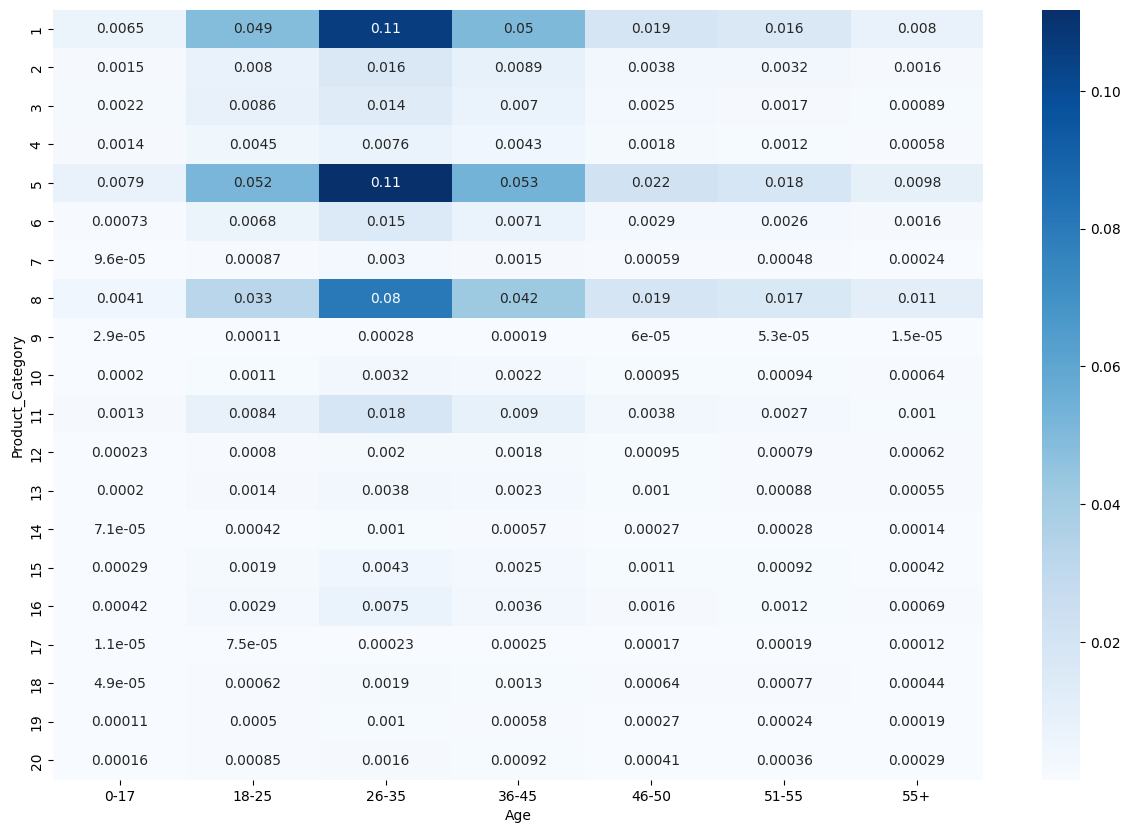

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab(df.Product_Category,df.Age, normalize=True), cmap='Blues', annot=True);

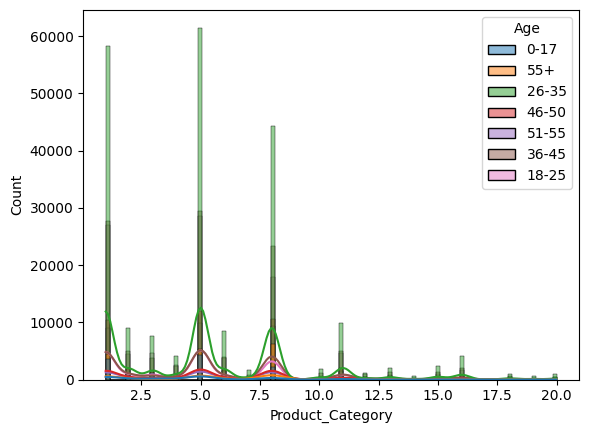

In [38]:
sns.histplot(data=df, x='Product_Category', hue='Age', kde=True);

#### Insignts and Analysis:
- **Age Distribution:** The majority of customers fall within the age groups of 26-35 and 18-25, each contributing around 40% and 18% respectively to the total customer base.
- **Product Category Preference by Age Group:**
    - Product Category 1 and 5 seems to be popular across all age groups (25.52% and 27.43%), with the highest proportion of customers from age 26-35 (41.49% and 40.72% respectively).
    - Product Category 8 also sees notable interest which is 20.71% of total customers, with the highest proportion of customers from age 26-35 (38.84% of all the age groups in that product category).
    - Certain product categories, like 9, 14, 17, etc., have very low overall proportions across all age groups which are 00.07%, 00.27%, 00.10% respectively.
- **Age Group Analysis:**
    - Younger age groups (0-17, 18-25) tend to have a higher proportion (Total of 20.86%) of customers compared to older age groups in most product categories.
    - Middle-aged groups (36-45, 46-50, 51-55) show relatively consistent proportions across various product categories (Ranges from 00.09%-26.70%, 00.07%-26.70% and 00.07%-26.70% respectively).
    - The older age group (55+) tends to have lower proportions which is 3.9% across all product categories compared to other age groups.
- **Overall Trend:** There's a gradual decline in proportions of customers as age increases, indicating that younger demographics are more actively engaged in purchasing across various product categories.
- **Implications:** 
    - Marketing efforts for products in Category 1 could be tailored more towards the 26-35 age group.
    - Products in Category 5 seem to appeal to a wide range of age groups, suggesting potential broad market appeal or the need for varied marketing approaches targeting different age groups.
    - Product categories with consistently low proportions across all age groups may require further analysis to understand customer preferences or may not align with the current customer base.

In [39]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Purchase_Bins
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Medium_income_group
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,High_income_group


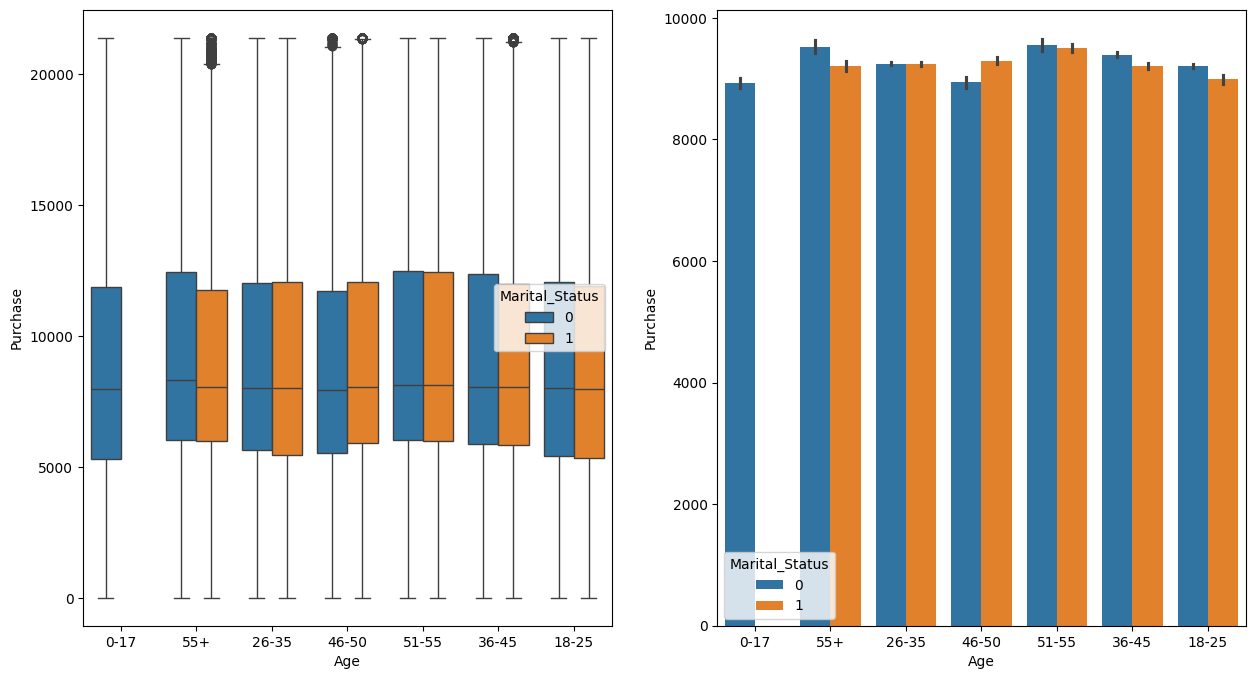

In [40]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Age', y='Purchase', hue='Marital_Status')
plt.subplot(1,2,2)
sns.barplot(data=df, x='Age', y='Purchase', hue='Marital_Status')
plt.show()

#### Insights and Analysis:
- **Higher Median Purchase for Married Individuals Across All Age Groups:** Married individuals consistently exhibit higher median purchase amounts compared to unmarried individuals across all age groups. This indicates that, on average, married individuals tend to spend more than their unmarried counterparts within each age group.
- **Wider Spread of Purchase Amounts for Married Individuals:** The spread of purchase amounts, as depicted by the height of the boxes and whiskers in a box plot, is wider for married individuals. This suggests that there is greater variability in purchase behavior among married individuals, with some spending significantly more and others spending significantly less compared to unmarried individuals.
- **Highest Purchase Values in the Age Group 26–35 Regardless of Marital Status:** The age group 26–35 consistently demonstrates the highest purchase values irrespective of marital status. Additionally, there's not a significant disparity in purchase values between different marital statuses within each age group, indicating that age plays a more prominent role in purchase behavior than marital status within these age brackets.
- **Significantly Lower Purchase Values in the Age Groups 0–17 and 55+:** The age groups 0–17 and 55+ exhibit notably lower purchase values compared to other age groups. This observation highlights certain demographic segments where purchasing activity may be lower, potentially due to factors such as dependence on others for finances in the case of minors or fixed incomes in retirement for older individuals.
- **Overall Implications:** While married individuals tend to have higher median purchases across all age groups, the variability in their purchase behavior suggests a more diverse spending pattern compared to unmarried individuals. Age group 26–35 emerges as a significant demographic segment for high purchase activity, regardless of marital status, indicating a prime target for marketing efforts.

In [41]:
pd.crosstab(df.Product_Category, df.Gender, margins=True)

Gender,F,M,All
Product_Category,,,
1,24831,115547,140378
2,5658,18206,23864
3,6006,14207,20213
4,3639,8114,11753
5,41961,108972,150933
6,4559,15907,20466
7,943,2778,3721
8,33558,80367,113925
9,70,340,410


In [42]:
pd.crosstab(df.Product_Category, df.Gender, margins=True, normalize=True)

Gender,F,M,All
Product_Category,,,
1,0.045142,0.210059,0.255201
2,0.010286,0.033098,0.043384
3,0.010919,0.025828,0.036746
4,0.006616,0.014751,0.021366
5,0.076283,0.198106,0.274390
6,0.008288,0.028918,0.037206
7,0.001714,0.005050,0.006765
8,0.061007,0.146104,0.207111
9,0.000127,0.000618,0.000745


In [43]:
pd.crosstab(df.Product_Category, df.Gender, margins=True, normalize='index')

Gender,F,M
Product_Category,,
1,0.176887,0.823113
2,0.237094,0.762906
3,0.297136,0.702864
4,0.309623,0.690377
5,0.278011,0.721989
6,0.222760,0.777240
7,0.253426,0.746574
8,0.294562,0.705438
9,0.170732,0.829268


In [44]:
pd.crosstab(df.Product_Category, df.Gender, margins=True, normalize='columns')

Gender,F,M,All
Product_Category,,,
1,0.182838,0.278925,0.255201
2,0.041661,0.043948,0.043384
3,0.044224,0.034295,0.036746
4,0.026795,0.019587,0.021366
5,0.308971,0.263053,0.274390
6,0.033569,0.038399,0.037206
7,0.006944,0.006706,0.006765
8,0.247097,0.194002,0.207111
9,0.000515,0.000821,0.000745


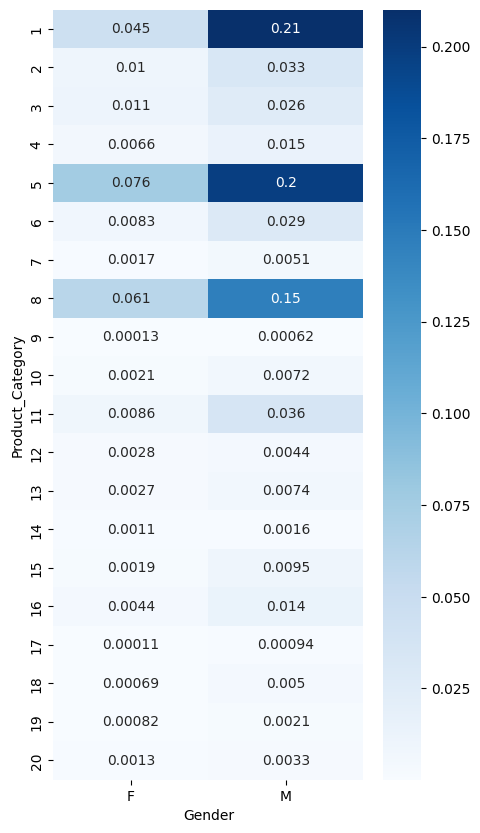

In [45]:
plt.figure(figsize=(5,10))
sns.heatmap(pd.crosstab(df.Product_Category, df.Gender, normalize=True), annot=True, cmap='Blues')
plt.show()

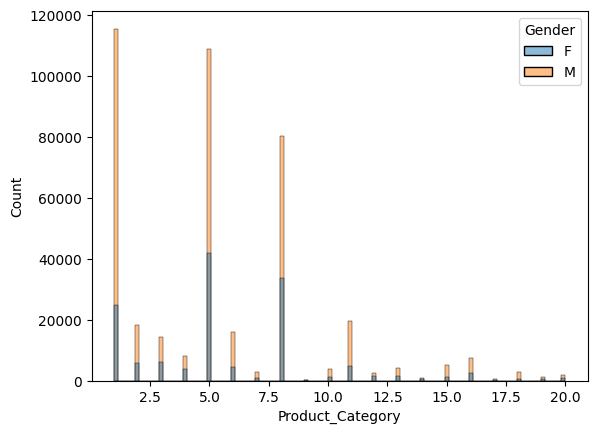

In [46]:
sns.histplot(data=df, x='Product_Category', hue='Gender');

#### Insights:
- **Product Category 5** holds the highest overall proportion of purchases, accounting for 27.44% of all purchases. Both male and female customers significantly contribute to this category, with females representing 27.80% and males 72.19% of its distribution. **Product Category 1** closely follows, representing 25.52% of all purchases, with a relatively higher contribution from male customers (82.31%). **Product Category 8** also exhibits notable popularity, contributing 20.71% of all purchases, with a higher proportion from male customers (70.54%).
- Male customers demonstrate a stronger preference for Product Categories 1, 5, and 8, representing 27.89%, 26.30%, and 19.40% respectively of the total male customer distribution. Conversely, female customers exhibit relatively similar preferences, with percentages of 18.28%, 30.89%, and 24.70% for the same categories out of the total female customer base.
- Certain product categories (e.g., Categories 9, 17, 18, 19, and 20) show relatively low proportions of purchases for both genders, suggesting that these categories may not be as popular among either male or female customers (0.07%, 0.10%, 0.56%, 0.29%, and 0.46% respectively out of the total customer distribution).

#### Overall Metrics:
- Product Category 5 maintains the highest proportion of purchases, followed closely by Category 1 and then Category 8 for both male and female customers.
- Male customers contribute more to the overall purchases compared to female customers across all product categories, representing a significant majority of 75.31% out of the total customer base.

# Effect of different Gender on Purchase

As we know, the CLT states that, regardless of the shape of the population distribution, the distribution of sample means will approach a normal distribution as the sample size increases and by applying the CLT, we can assume that the distribution of sample means is approximately normal, which allows us to make inferences about the population parameter (in this case, the average amount spent per gender) using the properties of the normal distribution.

**For entire population of Male:**

In [47]:
df_mp=df[df.Gender=='M'].Purchase.reset_index(drop=True)
df_mp

0          7969
1         15227
2         19215
3         15854
4         15686
          ...  
414254       61
414255      121
414256      494
414257      473
414258      368
Name: Purchase, Length: 414259, dtype: int64

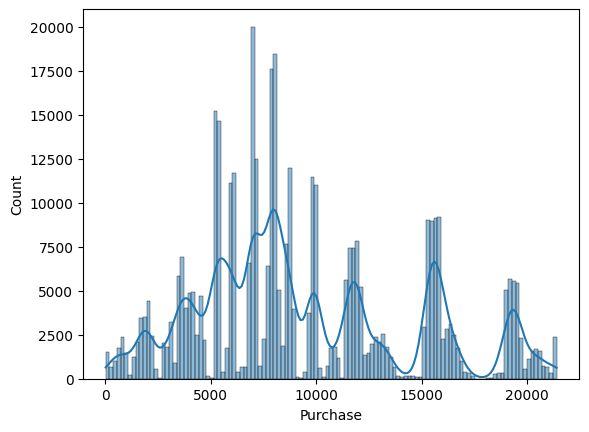

In [48]:
sns.histplot(df_mp, kde=True);

We can see that this is a non-normal distribution graph

In [49]:
#mean of entire population
mu=df_mp.mean()
mu.round(2)

9428.37

In [50]:
sigma=df_mp.std()
sigma.round(2)

5068.73

In [51]:
len(df_mp)

414259

Male: Population mean is 9428.37, population standard deviation is 5068.73 and number of males are 414259

In [52]:
male_mean=mu.round(2)
male_std=sigma.round(2)
male_population=len(df_mp)
male_std_error=male_std/math.sqrt(male_population)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=male_mean+z1*male_std_error
x2=male_mean+z2*male_std_error
x1, x2

(9412.93483513074, 9443.805164869262)

So, for the average amount spent by Male at 95% confidence interval is (9413.93, 9442.81)

**For entire population of Female:**

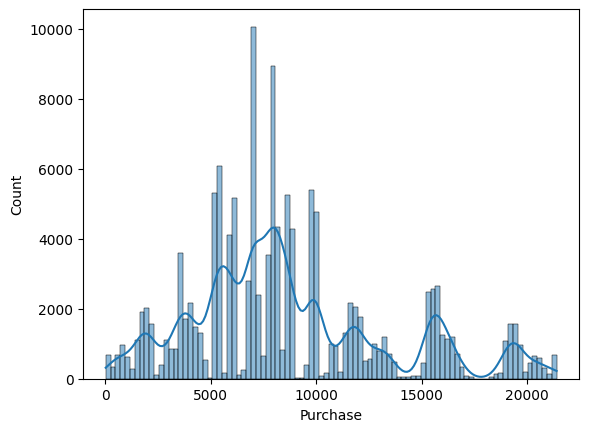

In [53]:
df_fp=df[df.Gender=='F'].Purchase.reset_index(drop=True)
sns.histplot(df_fp, kde=True);

We can see that this is a non-normal distribution graph

In [54]:
#mean and standard deviation of entire female population
mu=df_fp.mean()
sigma=df_fp.std()
mu.round(2), sigma.round(2), len(df_fp)

(8726.25, 4743.24, 135809)

Female: Population mean is 8726.25, population standard deviation is 4743.24 and number of females are 135809

In [55]:
female_mean=mu.round(2)
female_std=sigma.round(2)
female_population=len(df_fp)
female_std_error=female_std/math.sqrt(female_population)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=female_mean+z1*female_std_error
x2=female_mean+z2*female_std_error
x1, x2

(8701.023388722837, 8751.476611277163)

So, for the average amount spent by Female at 95% confidence interval is (8701.02, 8751.48)

**Taking the sample size of 300 for each gender**

**For male:**

In [56]:
df_mp.sample(300).mean(), df_mp.sample(300).mean(), df_mp.sample(300).mean()

(9385.4, 8884.27, 9424.83)

For every 300 samples, the mean will be different as sample has been taken randomly each time. 

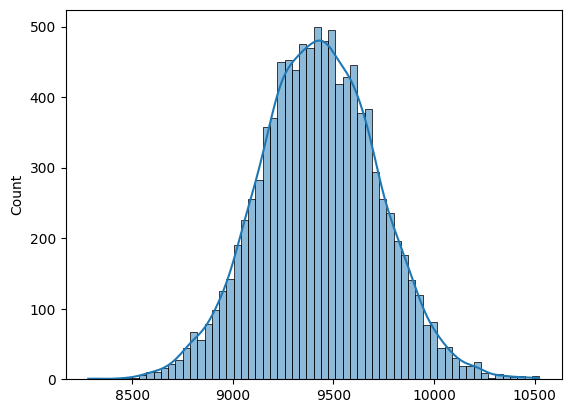

In [57]:
male_sample_300=[df_mp.sample(300).mean() for i in range(10000)]
sns.histplot(male_sample_300, kde=True);

So, to minimize the variation, we are conducting 10,000 iterations of samples, each with a size of 300. By doing so, we obtain a normal distribution of male purchase samples.

In [58]:
#Sample mean and Sample Standard Deviation:
np.mean(male_sample_300).round(2), np.std(male_sample_300).round(2)

(9426.78, 292.74)

In [59]:
male_sample_mean=np.mean(male_sample_300).round(2)
male_sample_std=np.std(male_sample_300).round(2)
male_sample_number=300
male_sample_std_error=male_sample_std/math.sqrt(male_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=male_sample_mean+z1*male_sample_std_error
x2=male_sample_mean+z2*male_sample_std_error
x1.round(2), x2.round(2)

(9393.65, 9459.91)

So, for the average amount spent by Male of sample size 300 at 95% confidence interval is (9393.65, 9459.91)

**For Female:**

In [60]:
df_fp.sample(300).mean(), df_fp.sample(300).mean(), df_fp.sample(300).mean()

(8691.876666666667, 8551.06, 8906.056666666667)

For every 300 samples, the mean will be different as sample has been taken randomly each time.

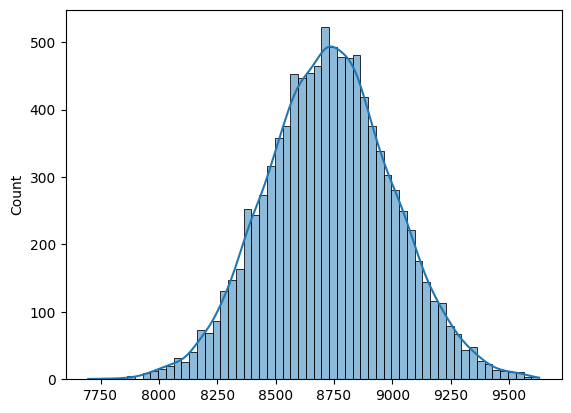

In [61]:
female_sample_300=[df_fp.sample(300).mean() for i in range(10000)]
sns.histplot(female_sample_300, kde=True);

In [62]:
female_sample_mean=np.mean(female_sample_300).round(2)
female_sample_std=np.std(female_sample_300).round(2)
female_sample_number=300
female_sample_std_error=female_sample_std/math.sqrt(female_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=female_sample_mean+z1*female_sample_std_error
x2=female_sample_mean+z2*female_sample_std_error
x1.round(2), x2.round(2)

(8700.84, 8761.98)

So, for the average amount spent by females with a sample size of 300, the 95% confidence interval is (8700.84, 8761.98).

**Taking the sample size of 3000 for each gender <br><br>
For male:**

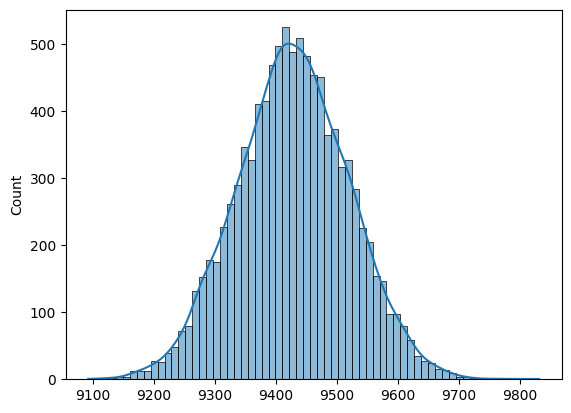

In [63]:
male_sample_3000=[df_mp.sample(3000).mean() for i in range(10000)]
sns.histplot(male_sample_3000, kde=True);

In [64]:
male_sample_mean=np.mean(male_sample_3000).round(2)
male_sample_std=np.std(male_sample_3000).round(2)
male_sample_number=3000
male_sample_std_error=male_sample_std/math.sqrt(male_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=male_sample_mean+z1*male_sample_std_error
x2=male_sample_mean+z2*male_sample_std_error
x1.round(2), x2.round(2)

(9425.24, 9431.8)

So, for the average amount spent by Males with a sample size of 3000, the 95% confidence interval is (9425.24, 9431.8).

**For Female:**

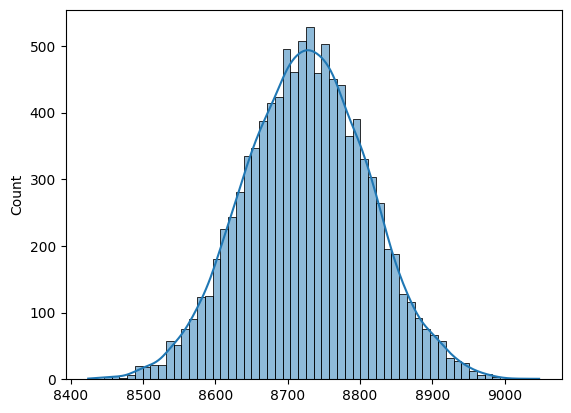

In [65]:
female_sample_3000=[df_fp.sample(3000).mean() for i in range(10000)]
sns.histplot(female_sample_3000, kde=True);

In [66]:
female_sample_mean=np.mean(female_sample_3000).round(2)
female_sample_std=np.std(female_sample_3000).round(2)
female_sample_number=3000
female_sample_std_error=female_sample_std/math.sqrt(female_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=female_sample_mean+z1*female_sample_std_error
x2=female_sample_mean+z2*female_sample_std_error
x1.round(2), x2.round(2)

(8723.16, 8729.28)

So, for the average amount spent by Females with a sample size of 3000, the 95% confidence interval is (8723.16, 8729.28).

**Taking the sample size of 30000 for each gender <br><br>
For male:**

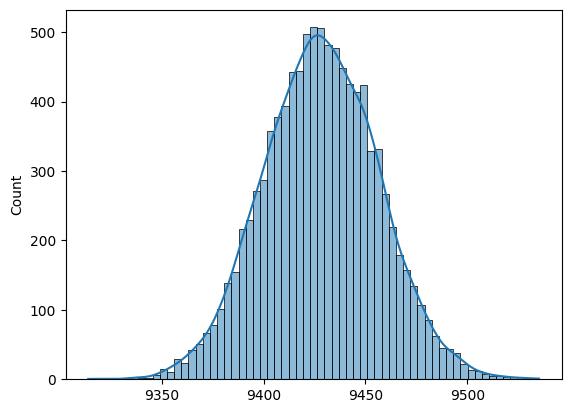

In [67]:
male_sample_30000=[df_mp.sample(30000).mean() for i in range(10000)]
sns.histplot(male_sample_30000, kde=True);

In [68]:
male_sample_mean=np.mean(male_sample_30000).round(2)
male_sample_std=np.std(male_sample_30000).round(2)
male_sample_number=30000
male_sample_std_error=male_sample_std/math.sqrt(male_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=male_sample_mean+z1*male_sample_std_error
x2=male_sample_mean+z2*male_sample_std_error
x1.round(2), x2.round(2)

(9427.88, 9428.52)

So, for the average amount spent by Males with a sample size of 30000, the 95% confidence interval is (9427.88, 9428.52).

**For Female:**

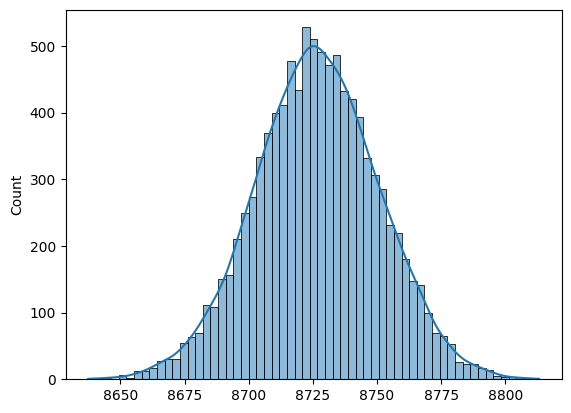

In [69]:
female_sample_30000=[df_fp.sample(30000).mean() for i in range(10000)]
sns.histplot(female_sample_30000, kde=True);

In [70]:
female_sample_mean=np.mean(female_sample_30000).round(2)
female_sample_std=np.std(female_sample_30000).round(2)
female_sample_number=30000
female_sample_std_error=female_sample_std/math.sqrt(female_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=female_sample_mean+z1*female_sample_std_error
x2=female_sample_mean+z2*female_sample_std_error
x1.round(2), x2.round(2)

(8726.37, 8726.91)

So, for the average amount spent by Females with a sample size of 30000, the 95% confidence interval is (8726.37, 8726.91).

### Summary:
Average amount spent by Male (total population) at 95% confidence interval is (9413.93, 9442.81)<br>
Average amount spent by Female (total population) at 95% confidence interval is (8701.02, 8751.48)<br>
Average amount spent by Male of sample size 300 at 95% confidence interval is (9400.80, 9466.40)<br>
Average amount spent by Females with a sample size of 300, the 95% confidence interval is (8700.84, 8761.98)<br>
Average amount spent by Males with a sample size of 3000, the 95% confidence interval is (9425.24, 9431.8).<br>
Average amount spent by Females with a sample size of 3000, the 95% confidence interval is (8723.16, 8729.28).<br>
Average amount spent by Males with a sample size of 30000, the 95% confidence interval is (9427.88, 9428.52)<br>
Average amount spent by Females with a sample size of 30000, the 95% confidence interval is (8726.37, 8726.91)<br>

#### Insights:
- The confidence interval computed using the entire dataset is wider for females compared to males. This could be due to several factors including differences in variability of spending habits between genders within the population. A wider interval suggests more uncertainty in estimating the true population mean for females compared to males.
- The width of the confidence interval is inversely proportional to the square root of the sample size. This is because larger sample sizes provide more precise estimates of the population parameter, resulting in narrower intervals.
- The confidence intervals for different sample sizes overlap. This is expected because they are all estimating the population mean with a certain level of confidence (95% in this case), and these estimates are subject to some degree of uncertainty. However, as the sample size increases, the intervals become narrower and may overlap to a lesser extent.
- As the sample size increases, the shape of the distribution of the means becomes more normally distributed, according to the Central Limit Theorem. This means that the distribution of the sample means approaches a normal distribution, regardless of the shape of the original population distribution.

#### Conclusion:
- **Male vs. Female Spending:**
    - In all sample sizes (300, 3000, and 30000), the average amount spent by males tends to be higher than that of females.
    - For example, in the smallest sample size of 300, the average amount spent by males ranges from approximately 9400.80 to 9466.40, while for females, it ranges from about 8700.84 to 8761.98.
- **Confidence Interval Overlap:**
    - Although the averages for males are consistently higher than those for females, there is some overlap in the confidence intervals, especially in the larger sample sizes.
    - This overlap suggests that while there may be a trend indicating that males tend to spend more than females on average, it's not an absolute rule. There are instances where females spend amounts that fall within the range of what males spend.

#### Summary
While the data suggest a tendency for males to spend more on average compared to females, it's not a definitive conclusion. 

# Effect of different Marital Status on Purchase

**For entire population of Not-Married:**

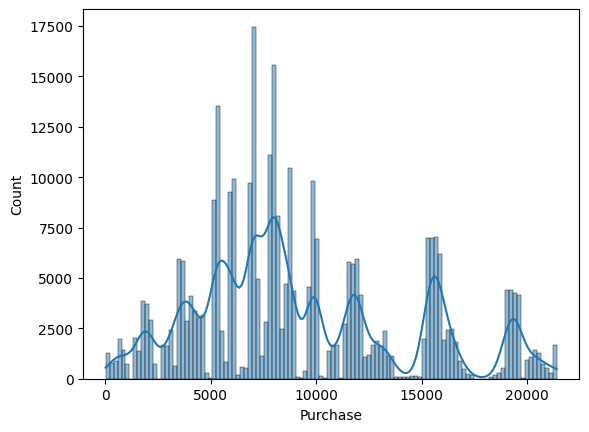

In [71]:
df_not_married=df[df.Marital_Status==0].Purchase.reset_index(drop=True)
sns.histplot(df_not_married, kde=True);

This is a non-normal distributed graph

In [72]:
not_married_mean=df_not_married.mean().round(2)
not_married_std=df_not_married.std().round(2)
not_married_population=len(df_not_married)
not_married_mean, not_married_std, not_married_population

(9257.52, 5005.28, 324731)

Not Married: Population mean is 9257.52, population standard deviation is 5005.28 and number of Not Married are 324731

In [73]:
not_married_std_error=not_married_std/math.sqrt(not_married_population)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=not_married_mean+z1*not_married_std_error
x2=not_married_mean+z2*not_married_std_error
x1.round(2), x2.round(2)

(9240.3, 9274.74)

So, for the average amount spent by Not-Married at 95% confidence interval is (9240.3, 9274.74)

**For entire population of Married:**

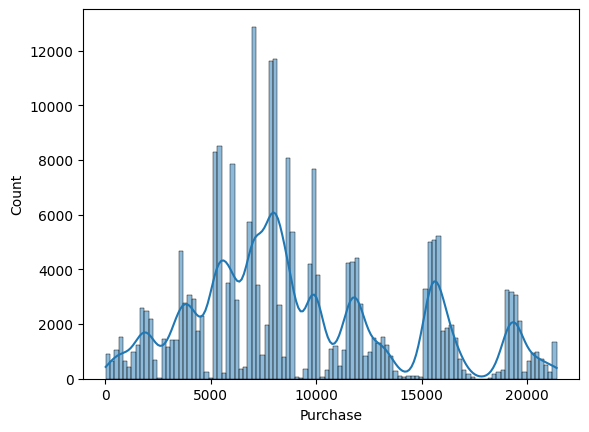

In [74]:
df_married=df[df.Marital_Status==1].Purchase.reset_index(drop=True)
sns.histplot(df_married, kde=True);

This is non-normal distributed graph

In [75]:
married_mean=df_married.mean().round(2)
married_std=df_married.std().round(2)
married_population=len(df_married)
married_mean, married_std, married_population

(9251.43, 4991.19, 225337)

Married: Population mean is 9251.43, population standard deviation is 4991.19 and number of Not Married are 225337

In [76]:
married_std_error=married_std/math.sqrt(married_population)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=married_mean+z1*married_std_error
x2=married_mean+z2*married_std_error
x1.round(2), x2.round(2)

(9230.82, 9272.04)

So, for the average amount spent by Married at 95% confidence interval is (9230.82, 9272.04)

**Taking the sample size of 300 for each Marital Status** <br><br>
**For Not-Married:**

In [77]:
df_not_married.sample(300).mean(), df_not_married.sample(300).mean(), df_not_married.sample(300).mean()

(8551.176666666666, 9385.343333333334, 9506.52)

For every 300 samples, the mean will be different as sample has been taken randomly each time.

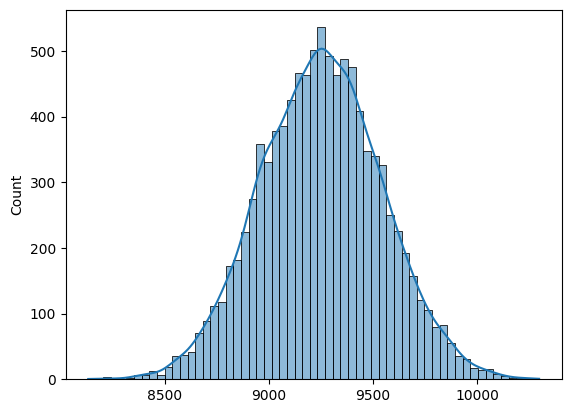

In [78]:
not_married_sample_300=[df_not_married.sample(300).mean() for i in range(10000)]
sns.histplot(not_married_sample_300, kde=True);

So, to minimize the variation, we are conducting 10,000 iterations of samples, each with a size of 300. By doing so, we obtain a normal distribution of Not-Married purchase samples.

In [79]:
#Sample mean and Sample Standard Deviation:
np.mean(not_married_sample_300).round(2), np.std(not_married_sample_300).round(2)

(9251.97, 289.9)

In [80]:
not_married_sample_mean=np.mean(not_married_sample_300).round(2)
not_married_sample_std=np.std(not_married_sample_300).round(2)
not_married_sample_number=300
not_married_sample_std_error=not_married_sample_std/math.sqrt(not_married_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=not_married_sample_mean+z1*not_married_sample_std_error
x2=not_married_sample_mean+z2*not_married_sample_std_error
x1.round(2), x2.round(2)

(9219.17, 9284.77)

So, for the average amount spent by Not-Married of sample size 300 at 95% confidence interval is (9219.17, 9284.77)

**For Married:**

In [81]:
df_married.sample(300).mean(), df_married.sample(300).mean(), df_married.sample(300).mean()

(9520.463333333333, 9481.433333333332, 9480.773333333333)

For every 300 samples, the mean will be different as sample has been taken randomly each time.

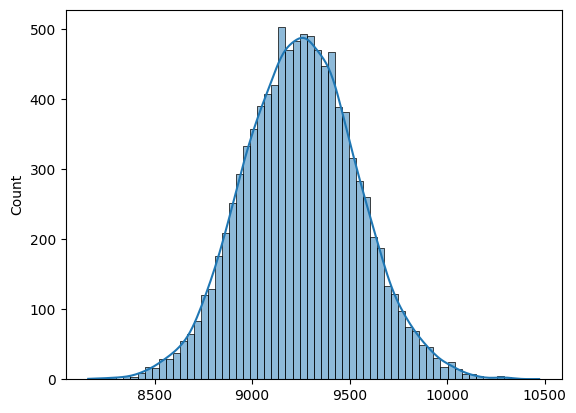

In [82]:
married_sample_300=[df_married.sample(300).mean() for i in range(10000)]
sns.histplot(married_sample_300, kde=True);

So, to minimize the variation, we are conducting 10,000 iterations of samples, each with a size of 300. By doing so, we obtain a normal distribution of Married purchase samples.

In [83]:
#Sample mean and Sample Standard Deviation:
np.mean(married_sample_300).round(2), np.std(married_sample_300).round(2)

(9251.36, 290.87)

In [84]:
married_sample_mean=np.mean(married_sample_300).round(2)
married_sample_std=np.std(married_sample_300).round(2)
married_sample_number=300
married_sample_std_error=married_sample_std/math.sqrt(married_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=married_sample_mean+z1*married_sample_std_error
x2=married_sample_mean+z2*married_sample_std_error
x1.round(2), x2.round(2)

(9218.45, 9284.27)

So, for the average amount spent by Married of sample size 300 at 95% confidence interval is (9218.45, 9284.27).

**Taking the sample size of 3000 for each Marital Status**<br><br>
**For Not-Married:**

In [85]:
df_not_married.sample(3000).mean(), df_not_married.sample(300).mean(), df_not_married.sample(300).mean()

(9170.430666666667, 9121.376666666667, 8914.706666666667)

For every 300 samples, the mean will be different as sample has been taken randomly each time.

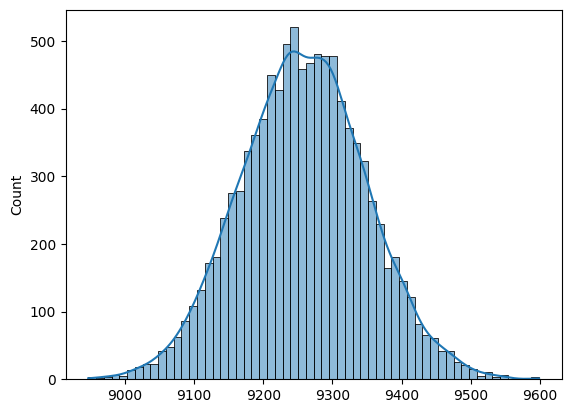

In [86]:
not_married_sample_3000=[df_not_married.sample(3000).mean() for i in range(10000)]
sns.histplot(not_married_sample_3000, kde=True);

So, to minimize the variation, we are conducting 10,000 iterations of samples, each with a size of 3000. By doing so, we obtain a normal distribution of Not-Married purchase samples.

In [87]:
#Sample mean and Sample Standard Deviation:
np.mean(not_married_sample_3000).round(2), np.std(not_married_sample_3000).round(2)

(9258.1, 90.75)

In [88]:
not_married_sample_mean=np.mean(not_married_sample_3000).round(2)
not_married_sample_std=np.std(not_married_sample_3000).round(2)
not_married_sample_number=3000
not_married_sample_std_error=not_married_sample_std/math.sqrt(not_married_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=not_married_sample_mean+z1*not_married_sample_std_error
x2=not_married_sample_mean+z2*not_married_sample_std_error
x1.round(2), x2.round(2)

(9254.85, 9261.35)

So, for the average amount spent by Not-Married of sample size 3000 at 95% confidence interval is (9254.85, 9261.35).

**For Married:**

In [89]:
df_married.sample(3000).mean(), df_married.sample(3000).mean(), df_married.sample(3000).mean()

(9073.148, 9294.258, 9266.215)

For every 3000 samples, the mean will be different as sample has been taken randomly each time.

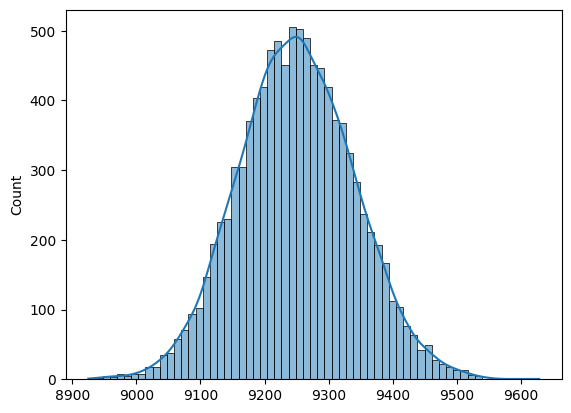

In [90]:
married_sample_3000=[df_married.sample(3000).mean() for i in range(10000)]
sns.histplot(married_sample_3000, kde=True);

So, to minimize the variation, we are conducting 10,000 iterations of samples, each with a size of 3000. By doing so, we obtain a normal distribution of Married purchase samples.

In [91]:
#Sample mean and Sample Standard Deviation:
np.mean(married_sample_3000).round(2), np.std(married_sample_3000).round(2)

(9250.16, 89.93)

In [92]:
married_sample_mean=np.mean(married_sample_3000).round(2)
married_sample_std=np.std(married_sample_3000).round(2)
married_sample_number=3000
married_sample_std_error=married_sample_std/math.sqrt(married_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=married_sample_mean+z1*married_sample_std_error
x2=married_sample_mean+z2*married_sample_std_error
x1.round(2), x2.round(2)

(9246.94, 9253.38)

So, for the average amount spent by Married of sample size 3000 at 95% confidence interval is (9246.94, 9253.38).

**Taking the sample size of 30000 for each Marital Status**<br><br>
**For Not-Married:**

In [93]:
df_not_married.sample(30000).mean(), df_not_married.sample(30000).mean(), df_not_married.sample(30000).mean()

(9217.031766666667, 9262.856166666666, 9214.682933333333)

For every 30000 samples, the mean will be different as sample has been taken randomly each time.

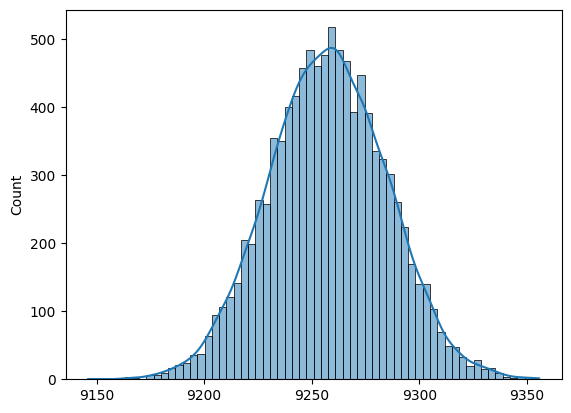

In [94]:
not_married_sample_30000=[df_not_married.sample(30000).mean() for i in range(10000)]
sns.histplot(not_married_sample_30000, kde=True);

So, to minimize the variation, we are conducting 10,000 iterations of samples, each with a size of 30000. By doing so, we obtain a normal distribution of Not-Married purchase samples.

In [95]:
#Sample mean and Sample Standard Deviation:
np.mean(not_married_sample_30000).round(2), np.std(not_married_sample_30000).round(2)

(9257.53, 27.38)

In [96]:
not_married_sample_mean=np.mean(not_married_sample_30000).round(2)
not_married_sample_std=np.std(not_married_sample_30000).round(2)
not_married_sample_number=30000
not_married_sample_std_error=not_married_sample_std/math.sqrt(not_married_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=not_married_sample_mean+z1*not_married_sample_std_error
x2=not_married_sample_mean+z2*not_married_sample_std_error
x1.round(2), x2.round(2)

(9257.22, 9257.84)

So, for the average amount spent by Not-Married of sample size 30000 at 95% confidence interval is (9257.22, 9257.84).

**For Married:**

In [97]:
df_married.sample(30000).mean(), df_married.sample(30000).mean(), df_married.sample(30000).mean()

(9257.042, 9255.535533333334, 9289.5452)

For every 30000 samples, the mean will be different as sample has been taken randomly each time.

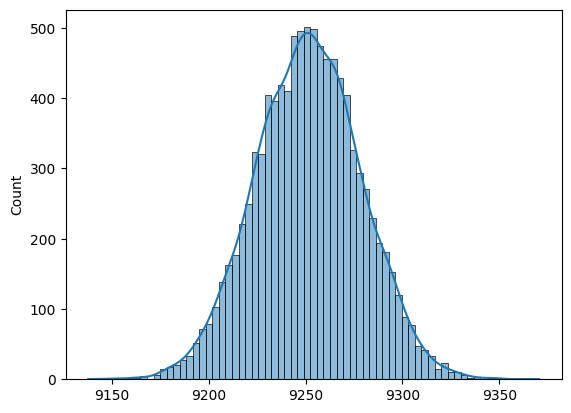

In [98]:
married_sample_30000=[df_married.sample(30000).mean() for i in range(10000)]
sns.histplot(married_sample_30000, kde=True);

So, to minimize the variation, we are conducting 10,000 iterations of samples, each with a size of 30000. By doing so, we obtain a normal distribution of Not-Married purchase samples.

In [99]:
#Sample mean and Sample Standard Deviation:
np.mean(married_sample_30000).round(2), np.std(married_sample_30000).round(2)

(9251.48, 27.16)

In [100]:
married_sample_mean=np.mean(married_sample_30000).round(2)
married_sample_std=np.std(married_sample_30000).round(2)
married_sample_number=30000
married_sample_std_error=married_sample_std/math.sqrt(married_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=married_sample_mean+z1*married_sample_std_error
x2=married_sample_mean+z2*married_sample_std_error
x1.round(2), x2.round(2)

(9251.17, 9251.79)

So, for the average amount spent by Married of sample size 30000 at 95% confidence interval is (9251.17, 9251.79).

### Summary:
- The average amount spent by Not-Married at 95% confidence interval is (9240.3, 9274.74)
- The average amount spent by Married at 95% confidence interval is (9230.82, 9272.04)
- The average amount spent by Not-Married of sample size 300 at 95% confidence interval is (9219.17, 9284.77)
- The average amount spent by Married of sample size 300 at 95% confidence interval is (9218.45, 9284.27)
- The average amount spent by Not-Married of sample size 3000 at 95% confidence interval is (9254.85, 9261.35)
- The average amount spent by Married of sample size 3000 at 95% confidence interval is (9246.94, 9253.38)
- The average amount spent by Not-Married of sample size 30000 at 95% confidence interval is (9257.22, 9257.84)
- The average amount spent by Married of sample size 30000 at 95% confidence interval is (9251.17, 9251.79)

#### Insights:
- The confidence interval computed using the entire dataset is slightly wider for the “Not-Married” group. This could be due to a greater variability in the amount spent within this group, which would result in a wider confidence interval.
- The width of the confidence interval is inversely proportional to the square root of the sample size. As the sample size increases, the width of the confidence interval decreases. This is because larger samples tend to provide a more accurate estimate of the population parameter, hence the confidence interval becomes narrower.
- The confidence intervals for different sample sizes do overlap. This suggests that the difference in the average amount spent between the “Married” and “Not-Married” groups is not statistically significant at the 95% confidence level.
- As the sample size increases, the distribution of the means becomes more narrowly spread around the population mean. This is due to the Central Limit Theorem, which states that the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the shape of the population distribution. This is why the confidence intervals become narrower with increasing sample size.

#### Conclusion:
- **For Not-Married individuals:**
    - Across all sample sizes (300, 3000, and 30000), the confidence intervals for the average amount spent are fairly wide but consistently overlap.
    - This indicates that there is no significant difference in the average amount spent between not-married individuals across different sample sizes.
- **For Married individuals:**
    - Similar to the not-married group, the confidence intervals for the average amount spent overlap across different sample sizes.
    - Again, this suggests that there is no significant difference in the average amount spent between married individuals across different sample sizes.

#### Summary:
Based on the provided data, there doesn't appear to be a significant difference in the amount spent based on marital status. Both not-married and married individuals seem to spend similar amounts, as indicated by the overlapping confidence intervals across different sample sizes.

# Effect of different Age Group on Purchase

0-17 &emsp; 1_temp<br>
18-25 &emsp; 2_temp<br>
26-35 &emsp; 3_temp<br>
36-45 &emsp; 4_temp<br>
46-50 &emsp; 5_temp<br>
51-55 &emsp; 6_temp<br>
55+ &emsp; 7_temp

In [101]:
df_1_temp=df[df.Age=='0-17'].Purchase.reset_index(drop=True)
df_2_temp=df[df.Age=='18-25'].Purchase.reset_index(drop=True)
df_3_temp=df[df.Age=='26-35'].Purchase.reset_index(drop=True)
df_4_temp=df[df.Age=='36-45'].Purchase.reset_index(drop=True)
df_5_temp=df[df.Age=='46-50'].Purchase.reset_index(drop=True)
df_6_temp=df[df.Age=='51-55'].Purchase.reset_index(drop=True)
df_7_temp=df[df.Age=='55+'].Purchase.reset_index(drop=True)

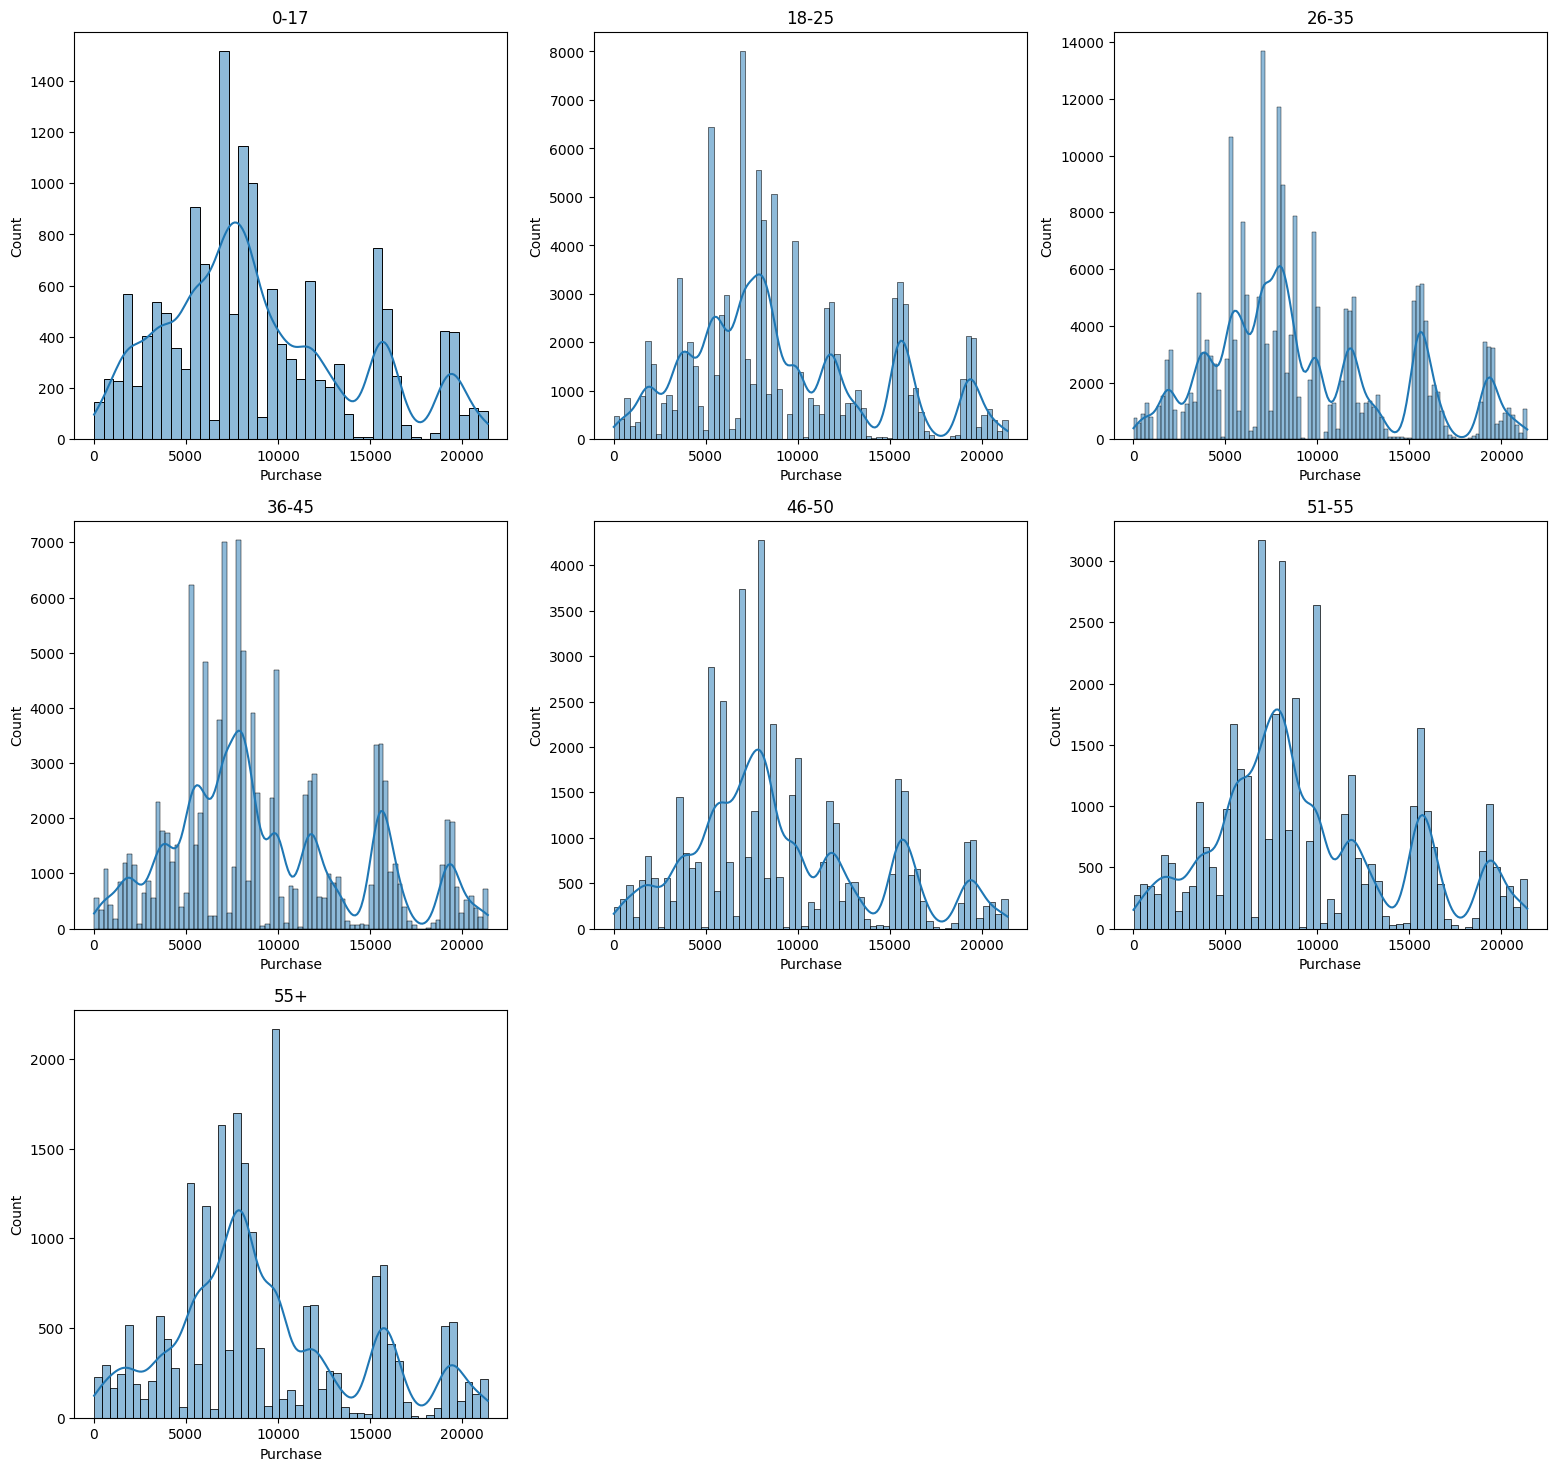

In [102]:
plt.figure(figsize=(19,18))
plt.subplot(3,3,1)
sns.histplot(df_1_temp, kde=True)
plt.title('0-17')
plt.subplot(3,3,2)
sns.histplot(df_2_temp, kde=True)
plt.title('18-25')
plt.subplot(3,3,3)
sns.histplot(df_3_temp, kde=True)
plt.title('26-35')
plt.subplot(3,3,4)
sns.histplot(df_4_temp, kde=True)
plt.title('36-45')
plt.subplot(3,3,5)
sns.histplot(df_5_temp, kde=True)
plt.title('46-50')
plt.subplot(3,3,6)
sns.histplot(df_6_temp, kde=True)
plt.title('51-55')
plt.subplot(3,3,7)
sns.histplot(df_7_temp, kde=True)
plt.title('55+');

All of them are non-normal distributed graph

In [103]:
#0-17 Age Group
df_1_temp_mean=df_1_temp.mean().round(2)
df_1_temp_std=df_1_temp.std().round(2)
df_1_temp_population=len(df_1_temp)
print(f'mean: {df_1_temp_mean}, standard deviation: {df_1_temp_std}, Population size: {df_1_temp_population}') 

mean: 8925.54, standard deviation: 5090.07, Population size: 15102


In [104]:
#18-25 Age Group
df_2_temp_mean=df_2_temp.mean().round(2)
df_2_temp_std=df_2_temp.std().round(2)
df_2_temp_population=len(df_2_temp)
print(f'mean: {df_2_temp_mean}, standard deviation: {df_2_temp_std}, Population size: {df_2_temp_population}') 

mean: 9164.19, standard deviation: 5019.86, Population size: 99660


In [105]:
#26-35 Age Group
df_3_temp_mean=df_3_temp.mean().round(2)
df_3_temp_std=df_3_temp.std().round(2)
df_3_temp_population=len(df_3_temp)
print(f'mean: {df_3_temp_mean}, standard deviation: {df_3_temp_std}, Population size: {df_3_temp_population}') 

mean: 9244.94, standard deviation: 4990.08, Population size: 219587


In [106]:
#36-45 Age Group
df_4_temp_mean=df_4_temp.mean().round(2)
df_4_temp_std=df_4_temp.std().round(2)
df_4_temp_population=len(df_4_temp)
print(f'mean: {df_4_temp_mean}, standard deviation: {df_4_temp_std}, Population size: {df_4_temp_population}') 

mean: 9320.89, standard deviation: 4995.48, Population size: 110013


In [107]:
#46-50 Age Group
df_5_temp_mean=df_5_temp.mean().round(2)
df_5_temp_std=df_5_temp.std().round(2)
df_5_temp_population=len(df_5_temp)
print(f'mean: {df_5_temp_mean}, standard deviation: {df_5_temp_std}, Population size: {df_5_temp_population}') 

mean: 9198.53, standard deviation: 4940.24, Population size: 45701


In [108]:
#51-55 Age Group
df_6_temp_mean=df_6_temp.mean().round(2)
df_6_temp_std=df_6_temp.std().round(2)
df_6_temp_population=len(df_6_temp)
print(f'mean: {df_6_temp_mean}, standard deviation: {df_6_temp_std}, Population size: {df_6_temp_population}')

mean: 9519.56, standard deviation: 5048.44, Population size: 38501


In [109]:
#55+ Age Group
df_7_temp_mean=df_7_temp.mean().round(2)
df_7_temp_std=df_7_temp.std().round(2)
df_7_temp_population=len(df_7_temp)
print(f'mean: {df_7_temp_mean}, standard deviation: {df_7_temp_std}, Population size: {df_7_temp_population}')

mean: 9319.76, standard deviation: 4968.0, Population size: 21504


In [110]:
#0-17 Age Group
df_1_temp_std_error=df_1_temp_std/math.sqrt(df_1_temp_population)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_1_temp_mean+z1*df_1_temp_std_error
x2=df_1_temp_mean+z2*df_1_temp_std_error
x1.round(2), x2.round(2)

(8844.36, 9006.72)

In [134]:
#18-25 Age Group
df_2_temp_std_error=df_2_temp_std/math.sqrt(df_2_temp_population)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_2_temp_mean+z1*df_2_temp_std_error
x2=df_2_temp_mean+z2*df_2_temp_std_error
x1.round(2), x2.round(2)

(9133.02, 9195.36)

In [135]:
#26-35 Age Group
df_3_temp_std_error=df_3_temp_std/math.sqrt(df_3_temp_population)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_3_temp_mean+z1*df_3_temp_std_error
x2=df_3_temp_mean+z2*df_3_temp_std_error
x1.round(2), x2.round(2)

(9224.07, 9265.81)

In [136]:
#36-45 Age Group
df_4_temp_std_error=df_4_temp_std/math.sqrt(df_4_temp_population)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_4_temp_mean+z1*df_4_temp_std_error
x2=df_4_temp_mean+z2*df_4_temp_std_error
x1.round(2), x2.round(2)

(9291.37, 9350.41)

In [140]:
#46-50 Age Group
df_5_temp_std_error=df_5_temp_std/math.sqrt(df_5_temp_population)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_5_temp_mean+z1*df_5_temp_std_error
x2=df_5_temp_mean+z2*df_5_temp_std_error
x1.round(2), x2.round(2)

(9153.24, 9243.82)

In [138]:
#51-55 Age Group
df_6_temp_std_error=df_6_temp_std/math.sqrt(df_6_temp_population)
z1=norm.ppf(0.025)
z2=norm.ppf(0.976)
x1=df_6_temp_mean+z1*df_6_temp_std_error
x2=df_6_temp_mean+z2*df_6_temp_std_error
x1.round(2), x2.round(2)

(9469.13, 9570.44)

In [139]:
#55+ Age Group
df_7_temp_std_error=df_7_temp_std/math.sqrt(df_7_temp_population)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_7_temp_mean+z1*df_7_temp_std_error
x2=df_7_temp_mean+z2*df_7_temp_std_error
x1.round(2), x2.round(2)

(9253.36, 9386.16)

The average amount spent at 95% confidence interval on entire dataset by:
- 0-17 Age Group: (8844.36, 9006.72)
- 18-25 Age Group: (9133.02, 9195.36)
- 26-35 Age Group: (9224.07, 9265.81)
- 36-45 Age Group: (9291.37, 9350.41)
- 46-50 Age Group: (9153.24, 9243.82)
- 51-55 Age Group: (9469.13, 9570.44)
- 55+ Age Group: (9253.36, 9386.16)

**Taking the sample size of 300 for each Age Groups**

In [118]:
df_1_temp_sample_300=[df_1_temp.sample(300).mean() for i in range(10000)]
df_2_temp_sample_300=[df_2_temp.sample(300).mean() for i in range(10000)]
df_3_temp_sample_300=[df_3_temp.sample(300).mean() for i in range(10000)]
df_4_temp_sample_300=[df_4_temp.sample(300).mean() for i in range(10000)]
df_5_temp_sample_300=[df_5_temp.sample(300).mean() for i in range(10000)]
df_6_temp_sample_300=[df_6_temp.sample(300).mean() for i in range(10000)]
df_7_temp_sample_300=[df_7_temp.sample(300).mean() for i in range(10000)]

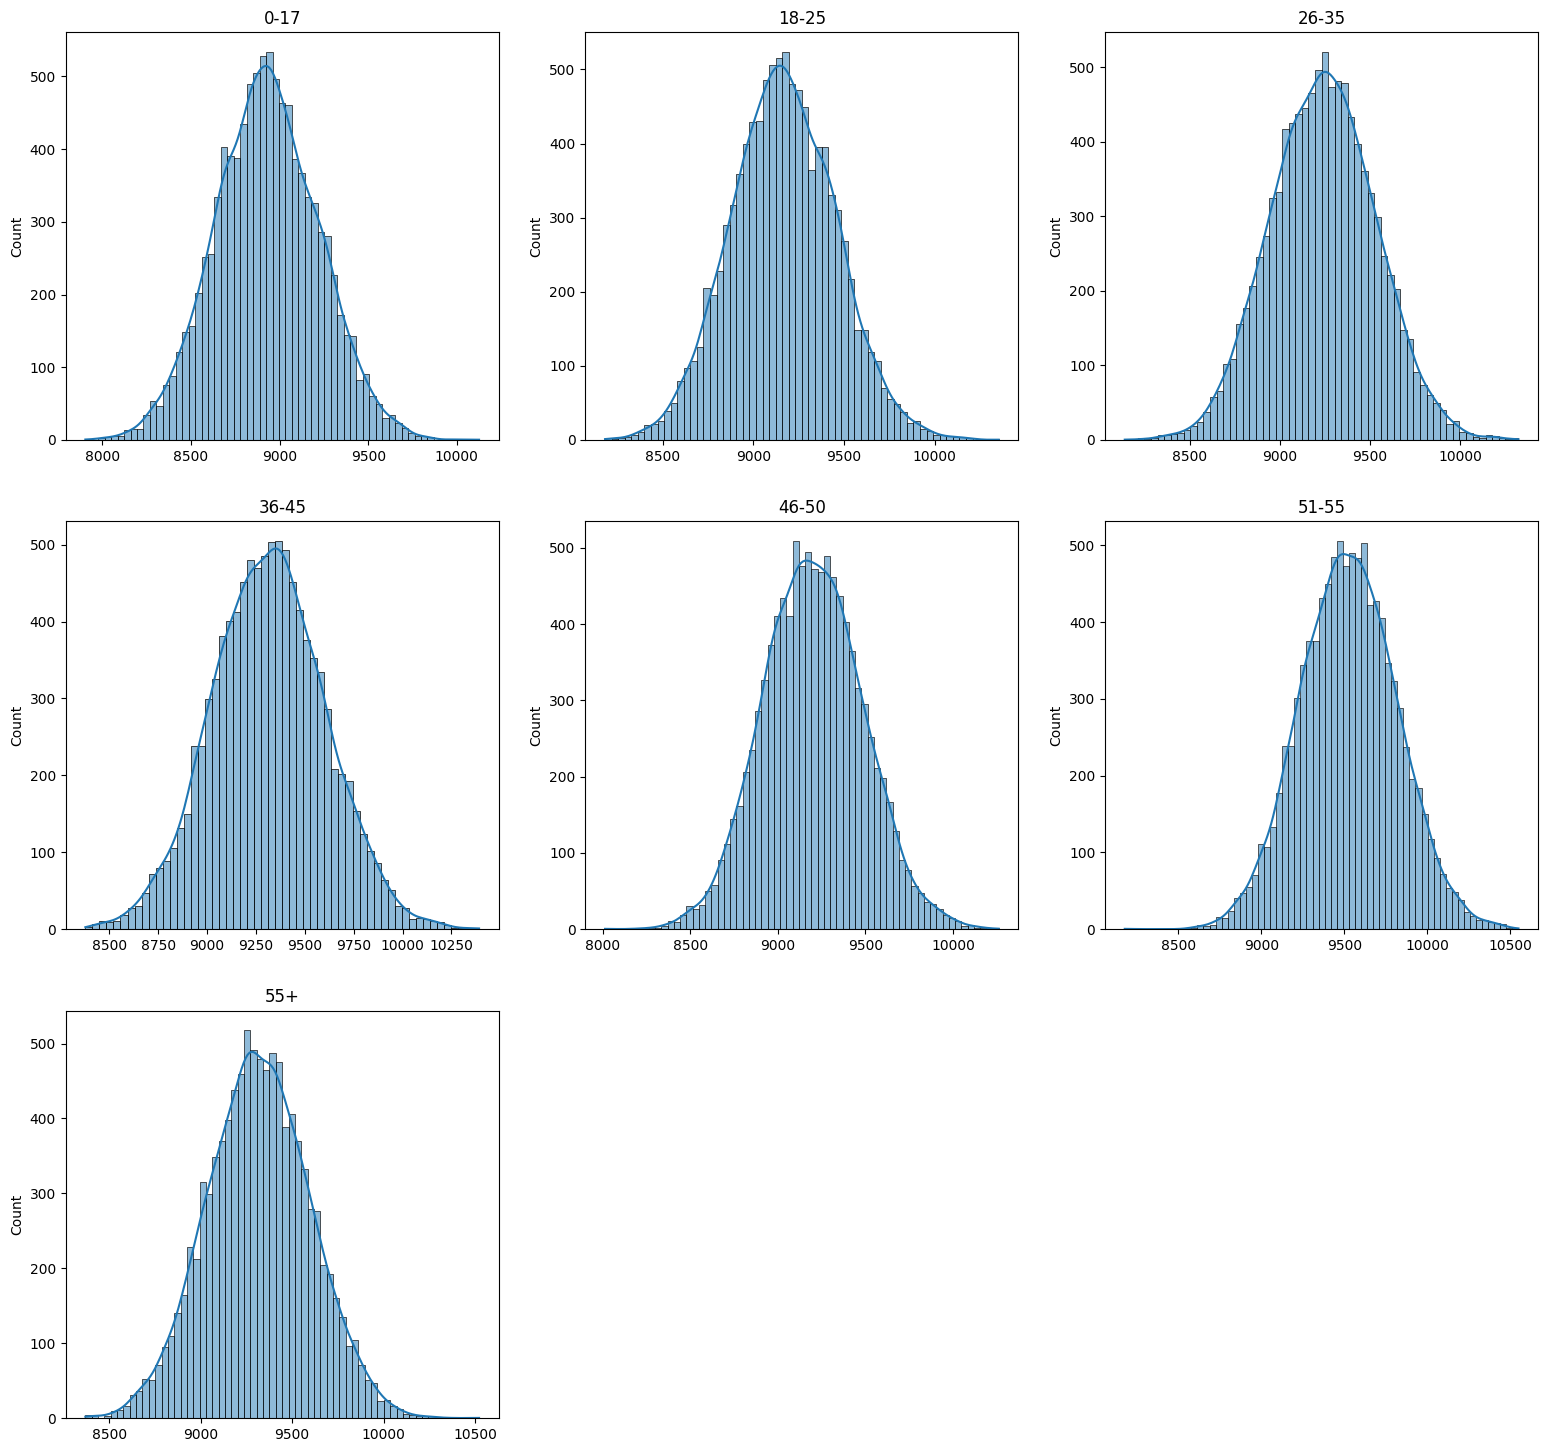

In [119]:
plt.figure(figsize=(19,18))
plt.subplot(3,3,1)
sns.histplot(df_1_temp_sample_300, kde=True)
plt.title('0-17')
plt.subplot(3,3,2)
sns.histplot(df_2_temp_sample_300, kde=True)
plt.title('18-25')
plt.subplot(3,3,3)
sns.histplot(df_3_temp_sample_300, kde=True)
plt.title('26-35')
plt.subplot(3,3,4)
sns.histplot(df_4_temp_sample_300, kde=True)
plt.title('36-45')
plt.subplot(3,3,5)
sns.histplot(df_5_temp_sample_300, kde=True)
plt.title('46-50')
plt.subplot(3,3,6)
sns.histplot(df_6_temp_sample_300, kde=True)
plt.title('51-55')
plt.subplot(3,3,7)
sns.histplot(df_7_temp_sample_300, kde=True)
plt.title('55+');

In [121]:
print('The average amount spent by each Age Group of sample size 300 at 95% confidence interval is:')
df_1_temp_sample_mean=np.mean(df_1_temp_sample_300).round(2)
df_1_temp_sample_std=np.std(df_1_temp_sample_300).round(2)
df_1_temp_sample_number=300
df_1_temp_sample_std_error=df_1_temp_sample_std/math.sqrt(df_1_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_1_temp_sample_mean+z1*df_1_temp_sample_std_error
x2=df_1_temp_sample_mean+z2*df_1_temp_sample_std_error
print(f"0-17: ({x1.round(2)}, {x2.round(2)})")

df_2_temp_sample_mean=np.mean(df_2_temp_sample_300).round(2)
df_2_temp_sample_std=np.std(df_2_temp_sample_300).round(2)
df_2_temp_sample_number=300
df_2_temp_sample_std_error=df_2_temp_sample_std/math.sqrt(df_2_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_2_temp_sample_mean+z1*df_2_temp_sample_std_error
x2=df_2_temp_sample_mean+z2*df_2_temp_sample_std_error
print(f"18-25: ({x1.round(2)}, {x2.round(2)})")

df_3_temp_sample_mean=np.mean(df_3_temp_sample_300).round(2)
df_3_temp_sample_std=np.std(df_3_temp_sample_300).round(2)
df_3_temp_sample_number=300
df_3_temp_sample_std_error=df_3_temp_sample_std/math.sqrt(df_3_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_3_temp_sample_mean+z1*df_3_temp_sample_std_error
x2=df_3_temp_sample_mean+z2*df_3_temp_sample_std_error
print(f"26-35: ({x1.round(2)}, {x2.round(2)})")

df_4_temp_sample_mean=np.mean(df_4_temp_sample_300).round(2)
df_4_temp_sample_std=np.std(df_4_temp_sample_300).round(2)
df_4_temp_sample_number=300
df_4_temp_sample_std_error=df_4_temp_sample_std/math.sqrt(df_4_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_4_temp_sample_mean+z1*df_4_temp_sample_std_error
x2=df_4_temp_sample_mean+z2*df_4_temp_sample_std_error
print(f"36-45: ({x1.round(2)}, {x2.round(2)})")

df_5_temp_sample_mean=np.mean(df_5_temp_sample_300).round(2)
df_5_temp_sample_std=np.std(df_5_temp_sample_300).round(2)
df_5_temp_sample_number=300
df_5_temp_sample_std_error=df_5_temp_sample_std/math.sqrt(df_5_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_5_temp_sample_mean+z1*df_5_temp_sample_std_error
x2=df_5_temp_sample_mean+z2*df_5_temp_sample_std_error
print(f"46-50: ({x1.round(2)}, {x2.round(2)})")

df_6_temp_sample_mean=np.mean(df_6_temp_sample_300).round(2)
df_6_temp_sample_std=np.std(df_6_temp_sample_300).round(2)
df_6_temp_sample_number=300
df_6_temp_sample_std_error=df_6_temp_sample_std/math.sqrt(df_6_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_6_temp_sample_mean+z1*df_6_temp_sample_std_error
x2=df_6_temp_sample_mean+z2*df_6_temp_sample_std_error
print(f"51-55: ({x1.round(2)}, {x2.round(2)})")

df_7_temp_sample_mean=np.mean(df_7_temp_sample_300).round(2)
df_7_temp_sample_std=np.std(df_7_temp_sample_300).round(2)
df_7_temp_sample_number=300
df_7_temp_sample_std_error=df_7_temp_sample_std/math.sqrt(df_7_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_7_temp_sample_mean+z1*df_7_temp_sample_std_error
x2=df_7_temp_sample_mean+z2*df_7_temp_sample_std_error
print(f"55+: ({x1.round(2)}, {x2.round(2)})")

The average amount spent by each Age Group of sample size 300 at 95% confidence interval is:
0-17: (8896.81, 8962.29)
18-25: (9133.73, 9198.73)
26-35: (9208.61, 9274.11)
36-45: (9282.22, 9347.56)
46-50: (9169.05, 9233.43)
51-55: (9493.14, 9558.8)
55+: (9285.52, 9349.32)


**Taking the sample size of 3000 for each Age Groups**

In [122]:
df_1_temp_sample_3000=[df_1_temp.sample(3000).mean() for i in range(10000)]
df_2_temp_sample_3000=[df_2_temp.sample(3000).mean() for i in range(10000)]
df_3_temp_sample_3000=[df_3_temp.sample(3000).mean() for i in range(10000)]
df_4_temp_sample_3000=[df_4_temp.sample(3000).mean() for i in range(10000)]
df_5_temp_sample_3000=[df_5_temp.sample(3000).mean() for i in range(10000)]
df_6_temp_sample_3000=[df_6_temp.sample(3000).mean() for i in range(10000)]
df_7_temp_sample_3000=[df_7_temp.sample(3000).mean() for i in range(10000)]

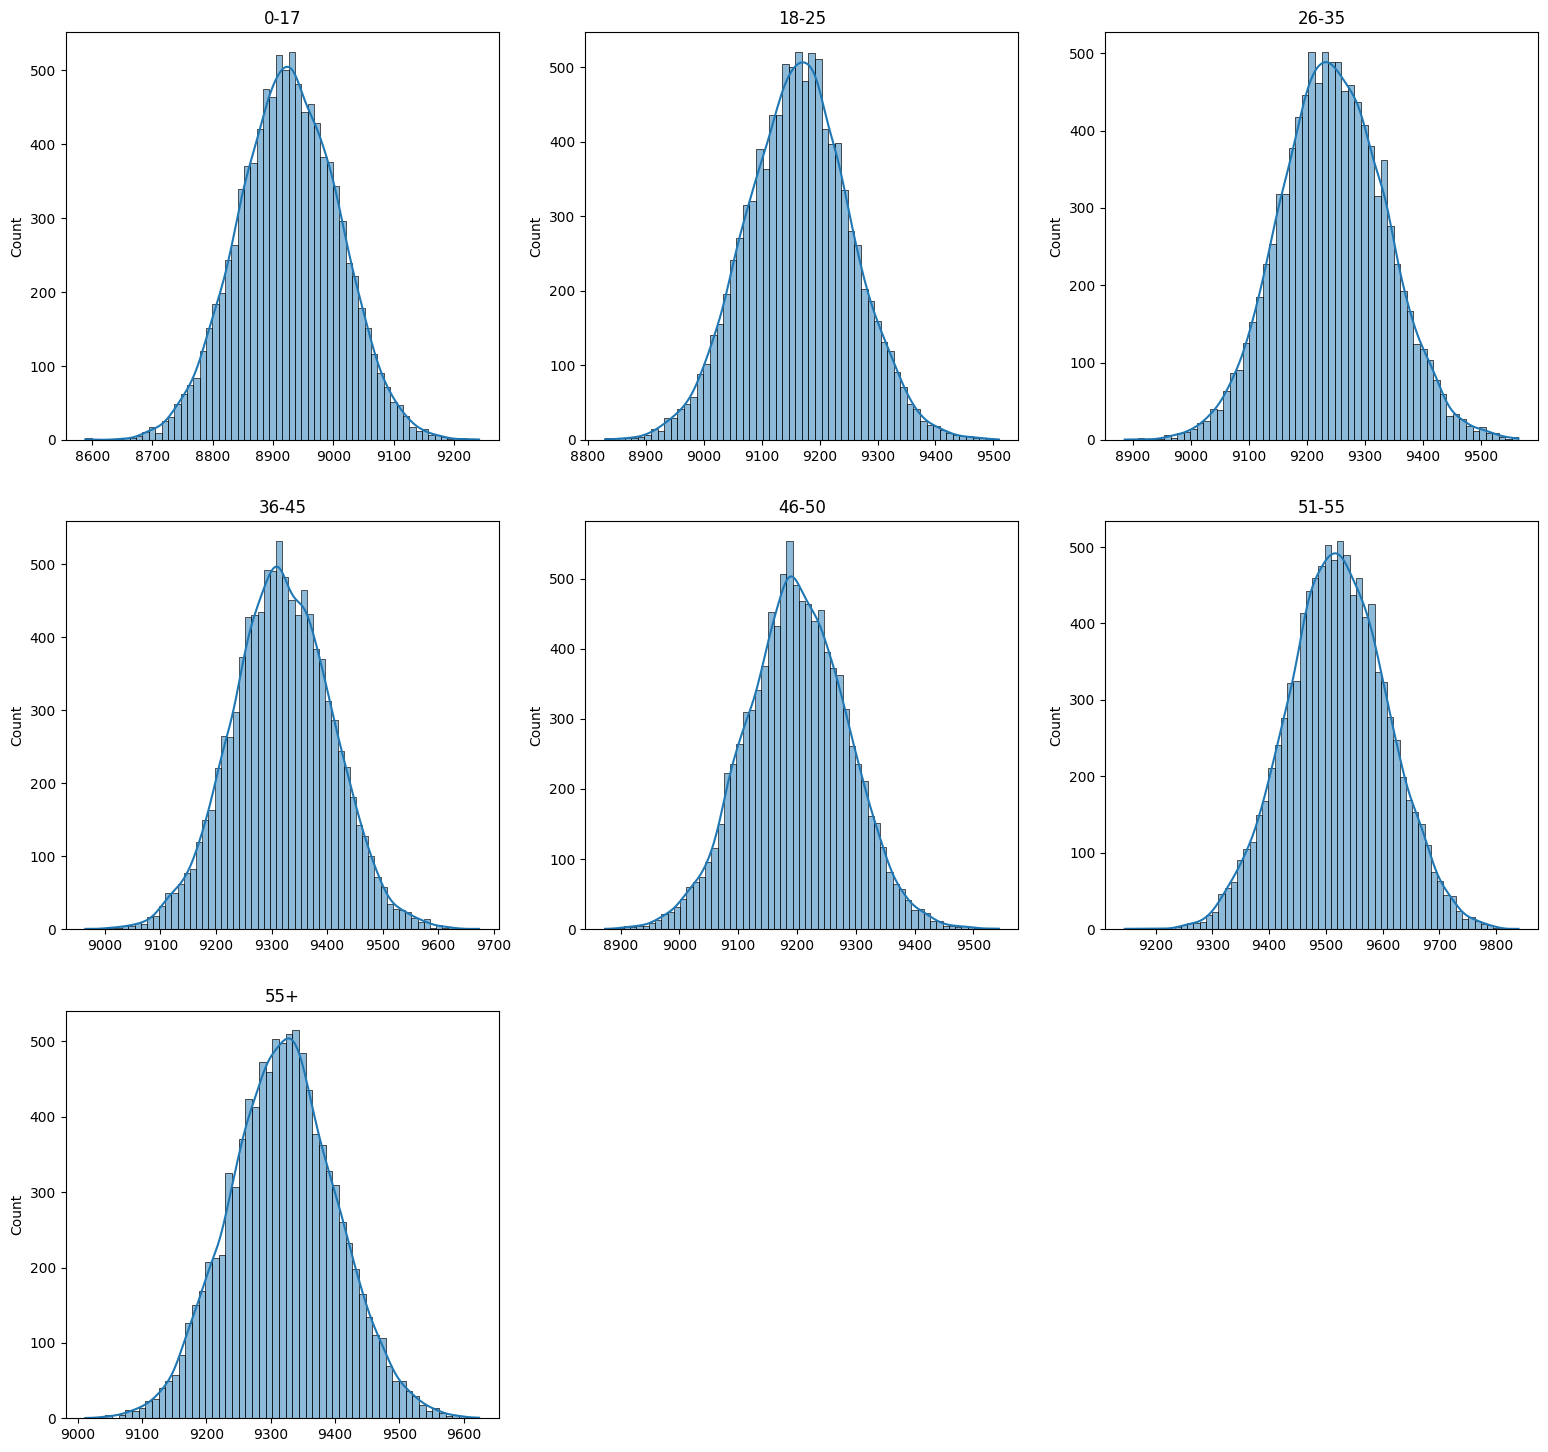

In [123]:
plt.figure(figsize=(19,18))
plt.subplot(3,3,1)
sns.histplot(df_1_temp_sample_3000, kde=True)
plt.title('0-17')
plt.subplot(3,3,2)
sns.histplot(df_2_temp_sample_3000, kde=True)
plt.title('18-25')
plt.subplot(3,3,3)
sns.histplot(df_3_temp_sample_3000, kde=True)
plt.title('26-35')
plt.subplot(3,3,4)
sns.histplot(df_4_temp_sample_3000, kde=True)
plt.title('36-45')
plt.subplot(3,3,5)
sns.histplot(df_5_temp_sample_3000, kde=True)
plt.title('46-50')
plt.subplot(3,3,6)
sns.histplot(df_6_temp_sample_3000, kde=True)
plt.title('51-55')
plt.subplot(3,3,7)
sns.histplot(df_7_temp_sample_3000, kde=True)
plt.title('55+');

In [124]:
print('The average amount spent by each Age Group of sample size 3000 at 95% confidence interval is:')
df_1_temp_sample_mean=np.mean(df_1_temp_sample_3000).round(2)
df_1_temp_sample_std=np.std(df_1_temp_sample_3000).round(2)
df_1_temp_sample_number=3000
df_1_temp_sample_std_error=df_1_temp_sample_std/math.sqrt(df_1_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_1_temp_sample_mean+z1*df_1_temp_sample_std_error
x2=df_1_temp_sample_mean+z2*df_1_temp_sample_std_error
print(f"0-17: ({x1.round(2)}, {x2.round(2)})")

df_2_temp_sample_mean=np.mean(df_2_temp_sample_3000).round(2)
df_2_temp_sample_std=np.std(df_2_temp_sample_3000).round(2)
df_2_temp_sample_number=3000
df_2_temp_sample_std_error=df_2_temp_sample_std/math.sqrt(df_2_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_2_temp_sample_mean+z1*df_2_temp_sample_std_error
x2=df_2_temp_sample_mean+z2*df_2_temp_sample_std_error
print(f"18-25: ({x1.round(2)}, {x2.round(2)})")

df_3_temp_sample_mean=np.mean(df_3_temp_sample_3000).round(2)
df_3_temp_sample_std=np.std(df_3_temp_sample_3000).round(2)
df_3_temp_sample_number=3000
df_3_temp_sample_std_error=df_3_temp_sample_std/math.sqrt(df_3_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_3_temp_sample_mean+z1*df_3_temp_sample_std_error
x2=df_3_temp_sample_mean+z2*df_3_temp_sample_std_error
print(f"26-35: ({x1.round(2)}, {x2.round(2)})")

df_4_temp_sample_mean=np.mean(df_4_temp_sample_3000).round(2)
df_4_temp_sample_std=np.std(df_4_temp_sample_3000).round(2)
df_4_temp_sample_number=3000
df_4_temp_sample_std_error=df_4_temp_sample_std/math.sqrt(df_4_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_4_temp_sample_mean+z1*df_4_temp_sample_std_error
x2=df_4_temp_sample_mean+z2*df_4_temp_sample_std_error
print(f"36-45: ({x1.round(2)}, {x2.round(2)})")

df_5_temp_sample_mean=np.mean(df_5_temp_sample_3000).round(2)
df_5_temp_sample_std=np.std(df_5_temp_sample_3000).round(2)
df_5_temp_sample_number=3000
df_5_temp_sample_std_error=df_5_temp_sample_std/math.sqrt(df_5_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_5_temp_sample_mean+z1*df_5_temp_sample_std_error
x2=df_5_temp_sample_mean+z2*df_5_temp_sample_std_error
print(f"46-50: ({x1.round(2)}, {x2.round(2)})")

df_6_temp_sample_mean=np.mean(df_6_temp_sample_3000).round(2)
df_6_temp_sample_std=np.std(df_6_temp_sample_3000).round(2)
df_6_temp_sample_number=3000
df_6_temp_sample_std_error=df_6_temp_sample_std/math.sqrt(df_6_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_6_temp_sample_mean+z1*df_6_temp_sample_std_error
x2=df_6_temp_sample_mean+z2*df_6_temp_sample_std_error
print(f"51-55: ({x1.round(2)}, {x2.round(2)})")

df_7_temp_sample_mean=np.mean(df_7_temp_sample_3000).round(2)
df_7_temp_sample_std=np.std(df_7_temp_sample_3000).round(2)
df_7_temp_sample_number=3000
df_7_temp_sample_std_error=df_7_temp_sample_std/math.sqrt(df_7_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_7_temp_sample_mean+z1*df_7_temp_sample_std_error
x2=df_7_temp_sample_mean+z2*df_7_temp_sample_std_error
print(f"55+: ({x1.round(2)}, {x2.round(2)})")

The average amount spent by each Age Group of sample size 3000 at 95% confidence interval is:
0-17: (8922.71, 8928.65)
18-25: (9160.72, 9167.22)
26-35: (9241.77, 9248.29)
36-45: (9315.63, 9322.03)
46-50: (9196.21, 9202.39)
51-55: (9516.64, 9522.98)
55+: (9316.52, 9322.52)


In [127]:
len(df_1_temp), len(df_2_temp), len(df_3_temp), len(df_4_temp), len(df_5_temp), len(df_6_temp), len(df_7_temp)

(15102, 99660, 219587, 110013, 45701, 38501, 21504)

We cannot take the sample size of 30000 as 0-17 Age Group's population size is 15102. So, we are taking 10000 sample size.

In [128]:
df_1_temp_sample_10000=[df_1_temp.sample(10000).mean() for i in range(10000)]
df_2_temp_sample_10000=[df_2_temp.sample(10000).mean() for i in range(10000)]
df_3_temp_sample_10000=[df_3_temp.sample(10000).mean() for i in range(10000)]
df_4_temp_sample_10000=[df_4_temp.sample(10000).mean() for i in range(10000)]
df_5_temp_sample_10000=[df_5_temp.sample(10000).mean() for i in range(10000)]
df_6_temp_sample_10000=[df_6_temp.sample(10000).mean() for i in range(10000)]
df_7_temp_sample_10000=[df_7_temp.sample(10000).mean() for i in range(10000)]

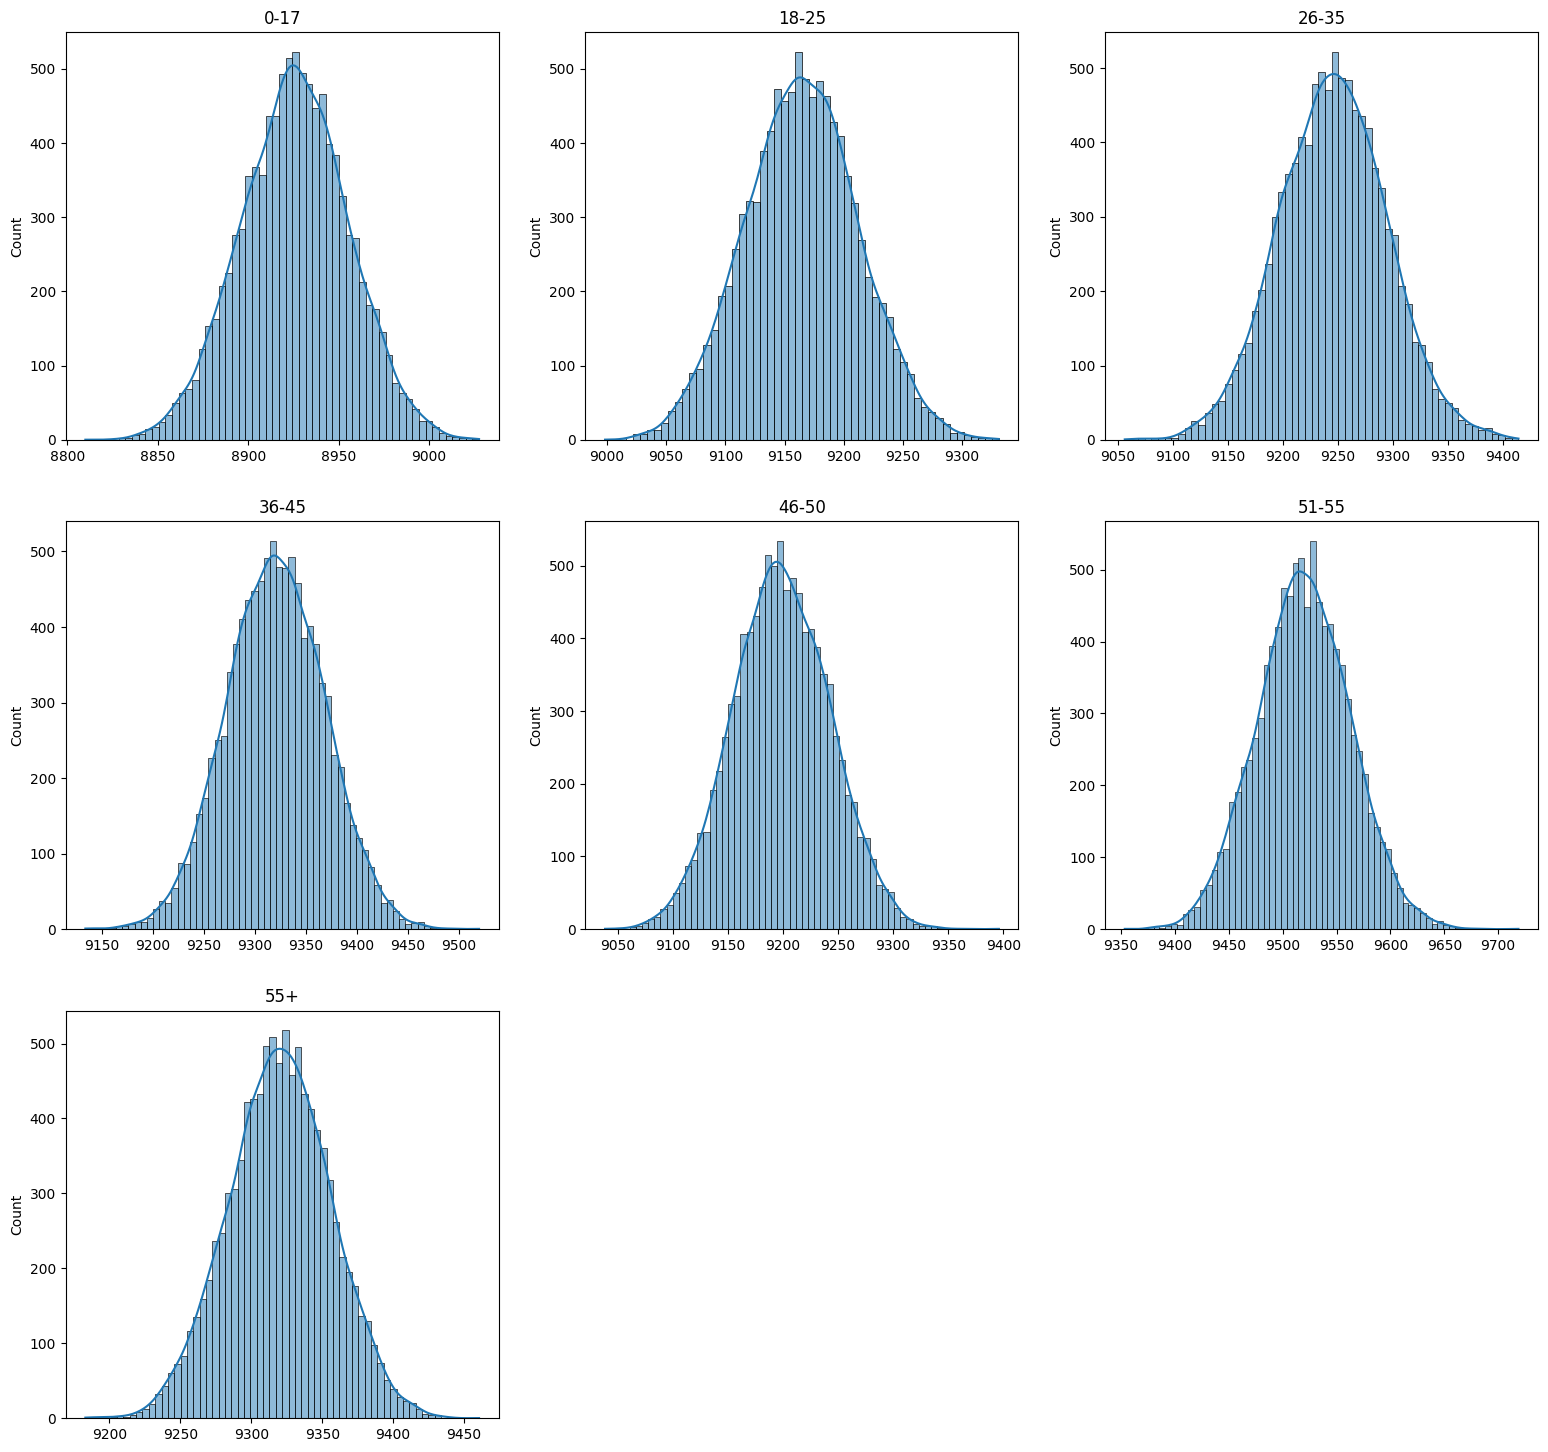

In [129]:
plt.figure(figsize=(19,18))
plt.subplot(3,3,1)
sns.histplot(df_1_temp_sample_10000, kde=True)
plt.title('0-17')
plt.subplot(3,3,2)
sns.histplot(df_2_temp_sample_10000, kde=True)
plt.title('18-25')
plt.subplot(3,3,3)
sns.histplot(df_3_temp_sample_10000, kde=True)
plt.title('26-35')
plt.subplot(3,3,4)
sns.histplot(df_4_temp_sample_10000, kde=True)
plt.title('36-45')
plt.subplot(3,3,5)
sns.histplot(df_5_temp_sample_10000, kde=True)
plt.title('46-50')
plt.subplot(3,3,6)
sns.histplot(df_6_temp_sample_10000, kde=True)
plt.title('51-55')
plt.subplot(3,3,7)
sns.histplot(df_7_temp_sample_10000, kde=True)
plt.title('55+');

In [144]:
print('The average amount spent by each Age Group of sample size 10000 at 95% confidence interval is:')
df_1_temp_sample_mean=np.mean(df_1_temp_sample_10000).round(2)
df_1_temp_sample_std=np.std(df_1_temp_sample_10000).round(2)
df_1_temp_sample_number=10000
df_1_temp_sample_std_error=df_1_temp_sample_std/math.sqrt(df_1_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_1_temp_sample_mean+z1*df_1_temp_sample_std_error
x2=df_1_temp_sample_mean+z2*df_1_temp_sample_std_error
print(f"0-17: ({x1.round(2)}, {x2.round(2)})")

df_2_temp_sample_mean=np.mean(df_2_temp_sample_10000).round(2)
df_2_temp_sample_std=np.std(df_2_temp_sample_10000).round(2)
df_2_temp_sample_number=10000
df_2_temp_sample_std_error=df_2_temp_sample_std/math.sqrt(df_2_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_2_temp_sample_mean+z1*df_2_temp_sample_std_error
x2=df_2_temp_sample_mean+z2*df_2_temp_sample_std_error
print(f"18-25: ({x1.round(2)}, {x2.round(2)})")

df_3_temp_sample_mean=np.mean(df_3_temp_sample_10000).round(2)
df_3_temp_sample_std=np.std(df_3_temp_sample_10000).round(2)
df_3_temp_sample_number=10000
df_3_temp_sample_std_error=df_3_temp_sample_std/math.sqrt(df_3_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_3_temp_sample_mean+z1*df_3_temp_sample_std_error
x2=df_3_temp_sample_mean+z2*df_3_temp_sample_std_error
print(f"26-35: ({x1.round(2)}, {x2.round(2)})")

df_4_temp_sample_mean=np.mean(df_4_temp_sample_10000).round(2)
df_4_temp_sample_std=np.std(df_4_temp_sample_10000).round(2)
df_4_temp_sample_number=10000
df_4_temp_sample_std_error=df_4_temp_sample_std/math.sqrt(df_4_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_4_temp_sample_mean+z1*df_4_temp_sample_std_error
x2=df_4_temp_sample_mean+z2*df_4_temp_sample_std_error
print(f"36-45: ({x1.round(2)}, {x2.round(2)})")

df_5_temp_sample_mean=np.mean(df_5_temp_sample_10000).round(2)
df_5_temp_sample_std=np.std(df_5_temp_sample_10000).round(2)
df_5_temp_sample_number=10000
df_5_temp_sample_std_error=df_5_temp_sample_std/math.sqrt(df_5_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_5_temp_sample_mean+z1*df_5_temp_sample_std_error
x2=df_5_temp_sample_mean+z2*df_5_temp_sample_std_error
print(f"46-50: ({x1.round(2)}, {x2.round(2)})")

df_6_temp_sample_mean=np.mean(df_6_temp_sample_10000).round(2)
df_6_temp_sample_std=np.std(df_6_temp_sample_10000).round(2)
df_6_temp_sample_number=10000
df_6_temp_sample_std_error=df_6_temp_sample_std/math.sqrt(df_6_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_6_temp_sample_mean+z1*df_6_temp_sample_std_error
x2=df_6_temp_sample_mean+z2*df_6_temp_sample_std_error
print(f"51-55: ({x1.round(2)}, {x2.round(2)})")

df_7_temp_sample_mean=np.mean(df_7_temp_sample_10000).round(2)
df_7_temp_sample_std=np.std(df_7_temp_sample_10000).round(2)
df_7_temp_sample_number=10000
df_7_temp_sample_std_error=df_7_temp_sample_std/math.sqrt(df_7_temp_sample_number)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
x1=df_7_temp_sample_mean+z1*df_7_temp_sample_std_error
x2=df_7_temp_sample_mean+z2*df_7_temp_sample_std_error
print(f"55+: ({x1.round(2)}, {x2.round(2)})")

The average amount spent by each Age Group of sample size 10000 at 95% confidence interval is:
0-17: (8925.2, 8926.36)
18-25: (9163.62, 9165.48)
26-35: (9244.57, 9246.49)
36-45: (9319.49, 9321.35)
46-50: (9197.64, 9199.36)
51-55: (9519.0, 9520.68)
55+: (9319.55, 9320.95)


#### Insights:
- The confidence interval computed using the entire dataset is wider for the age groups 0-17, 55+, 51-55 respectively in decreasing order. This is because of the wider Age Groups results in higher uncertainty about the true population parameter, leading to wider confidence intervals. 
- The width of the confidence interval is inversely proportional to the square root of the sample size. As the sample size increases, the width of the confidence interval decreases. This is because larger sample sizes provide more information about the population parameter, reducing the uncertainty and resulting in narrower intervals.
- The confidence intervals for different sample sizes overlap. However, as the sample size increases, the overlap becomes smaller because the confidence intervals become narrower due to decreased uncertainty.
- As the sample size increases, the shape of the distribution of the means approaches a normal distribution, regardless of the shape of the original distribution. This is described by the Central Limit Theorem (CLT). With smaller sample sizes, the distribution of the means may appear more skewed or varied, but as the sample size increases, the distribution becomes more symmetrical and closely resembles a normal distribution.
#### Overall Trends:
- **0-17 Age Group:** The average amount spent remains relatively stable across different sample sizes, with slight fluctuations within a narrow range.
- **18-25 Age Group:** Similar to the 0-17 age group, the average amount spent shows minimal variation across different sample sizes.
- **26-35 Age Group:** The average amount spent slightly increases with age within this group, showing a gradual upward trend.
- **36-45 Age Group:** The trend of increasing average amount spent continues, with slightly larger confidence intervals compared to the previous groups.
- **46-50 Age Group:** There's a slight decrease in the average amount spent compared to the preceding age group, but the difference is not significant.
- **51-55 Age Group:** The average amount spent shows a notable increase compared to the 46-50 age group, indicating a potential increase in spending as individuals move into this age bracket.
- **55+ Age Group:** The trend of increased spending appears to plateau within this age group, with relatively consistent average amounts spent across different sample sizes.
#### Explanations:
- The observed trends could be attributed to various factors such as income levels, lifestyle changes, financial responsibilities, and priorities associated with different age groups.
- Younger age groups (0-25) might have relatively lower average spending due to limited disposable income, while older age groups (especially 51-55 and 55+) might have higher average spending due to increased financial stability, savings, and potentially higher discretionary income.
- The slight fluctuations within each age group across different sample sizes suggest inherent variability in spending behavior within each demographic, which could be influenced by individual preferences, socioeconomic factors, and other external variables.
#### Summary:
Age appears to have a nuanced effect on the amount spent, with some age groups showing consistent spending patterns across different sample sizes, while others exhibit slight variations or trends of increasing or decreasing spending with age.

# Report:
### Overall Analysis:
- **Purchase Behavior Patterns:**
    - The purchase price distribution indicates multimodality, suggesting distinct customer groups or popular price points.
    - Gender, city category, and city tenure show no significant impact on purchase amounts, while marital status also has minimal influence.
    - Age group and occupation shed light on the demographic representation and common occupations within the dataset.
- **Demographic Trends:**
    - Majority of customers are male, aged 26-35, residing in city category B, with one year city tenure, and unmarried.
    - The dataset predominantly represents younger age groups, with a concentration in certain product categories like 5, 1, and 8.
- **Purchase Behavior Analysis:**
    - Married individuals tend to spend more across all age groups compared to unmarried individuals.
    - Age plays a more significant role than marital status in determining purchase behavior, with the age group 26–35 consistently exhibiting the highest purchase values.
    - Certain demographic segments, such as minors and older individuals, exhibit lower purchasing activity.
- **Product Category Preferences:**
    - Product categories 5, 1, and 8 are the most popular, with gender differences in preference observed.
    - Some categories have low overall proportions, indicating less popularity among customers.
- **Statistical Analysis:**
    - On average, males tend to spend more than females across all sample sizes. However, there is overlap in the confidence intervals, indicating variability within the data. While there's a trend suggesting higher spending by males, it's not an absolute rule, and there are instances where females spend amounts comparable to males.
    - For both not-married and married individuals, there is no significant difference in the average amount spent across different sample sizes. Overlapping confidence intervals suggest similar spending patterns regardless of marital status.
    - Spending behavior varies across age groups. Younger age groups (0-25) typically have lower average spending due to limited disposable income, while older age groups (especially 51-55 and 55+) may have higher spending due to increased financial stability. However, there are fluctuations within each age group across different sample sizes, indicating variability influenced by individual preferences and external factors.
### Over Recommendations:
- **Price Point Optimization:** Considering the multimodal distribution of purchase prices, focus on product offerings within the most common price ranges (5000-7500 and 15000) to cater to different customer segments.
- **Targeted Marketing by Demographics:** While gender and marital status don't significantly impact purchase amounts, tailor marketing strategies based on city category and age groups. City Category B appears to have the highest median purchase amount, and the majority of customers are in the 26-35 age group.
- **Product Category Focus:** Concentrate on popular product categories such as 5, 1, and 8, which have higher counts and purchase proportions. Additionally, consider the differential preferences between genders for certain product categories to optimize marketing efforts.
- **Age Group Insights:** Recognize the dominance of the 26-35 age group and adjust marketing strategies accordingly. Additionally, be aware of the lower purchase values in the age groups 0-17 and 55+, and consider targeted campaigns to address these segments. Consider offering promotions or discounts aimed at younger age groups to attract more budget-conscious consumers.
- **Marital Status Impact:** Married individuals consistently exhibit higher median purchase amounts across all age groups. Consider tailoring marketing efforts to appeal to this demographic, while also acknowledging the wider spread of purchase amounts among married individuals.
- **Gender Impact:** Develop targeted marketing campaigns that appeal to both male and female demographics. While males tend to spend more on average, it's important not to overlook the purchasing power of females.